 # DataSet Video Juegos ICE


## carga de librerias

In [1]:
# Carga de librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats as st
from matplotlib.patches import Patch

In [2]:
# Carga de archivos de DataFrame

print("#############################################")
print("#           VIDEOGAMES ICE DATASET          #")
print("#############################################")

print("\n╔════════════════════════════════╗")  
print("║   ANÁLISIS DE CIENCIA DE DATOS ║")  
print("║         DESARROLLADO POR       ║")  
print("║    Mauricio Zárate Romero      ║")  
print("╚════════════════════════════════╝") 

# video_games_ice = df_ice

df_ice_copy = pd.read_csv('/datasets/games.csv')

# Copia de seguridad para no modificar los DataFrames originales.

df_ice = df_ice_copy.copy()

#############################################
#           VIDEOGAMES ICE DATASET          #
#############################################

╔════════════════════════════════╗
║   ANÁLISIS DE CIENCIA DE DATOS ║
║         DESARROLLADO POR       ║
║    Mauricio Zárate Romero      ║
╚════════════════════════════════╝


---
---

### Preparar los datos

In [3]:
# Información general/resumida sobre el DataFrame

print("\n╔══════════════════════════════════════════════════╗")
print("║                   'games.csv'                    ║")
print("║                  'Información'                   ║")
print("╚══════════════════════════════════════════════════╝")
print("\n" + "=" * 50)
df_ice.info()
print("\n" + "=" * 50)
print("\n- Total de filas duplicadas:", df_ice.duplicated().sum())
print("\n" + "=" * 50)
print('\n- Total de valores nulos:\n \n', df_ice.isna().sum())


╔══════════════════════════════════════════════════╗
║                   'games.csv'                    ║
║                  'Información'                   ║
╚══════════════════════════════════════════════════╝

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- Total de filas duplicad

In [4]:
df_ice.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1033,Hitman: Absolution,X360,2012.0,Action,0.68,0.88,0.01,0.17,79.0,7.1,M
7005,Cabela's Outdoor Adventures (2009),PS3,2009.0,Sports,0.21,0.00,0.00,0.02,NaN,tbd,T
15813,Aedis Eclipse: Generation of Chaos,PSP,2006.0,Role-Playing,0.02,0.00,0.00,0.00,62.0,6.5,E10+
16535,Zettai Kaikyuu Gakuen: Eden with Roses and Pha...,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
6944,Are You Smarter than a 5th Grader? Game Time,DS,2009.0,Puzzle,0.22,0.00,0.00,0.02,NaN,tbd,E
11517,Kenshuui Tendo Dokuta,DS,2004.0,Simulation,0.00,0.00,0.08,0.00,NaN,NaN,NaN
14066,Trick x Logic: Season 2,PSP,2010.0,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
9944,Onechanbara: Bikini Zombie Slayers,Wii,2008.0,Action,0.11,0.00,0.00,0.01,55.0,8,M
1315,Red Dead Revolver,PS2,2004.0,Shooter,0.71,0.55,0.00,0.19,73.0,7.8,M


---
---

Debido a el cómo están conformados los datos tomé la decisión de tratarlos individualmente 
por columna, ya que varias difieren en la necesidad de tratamiento. Pero siguiendo las puntos
a continuación mencionados.



- Reemplaza los nombres de las columnas (ponlos en minúsculas).


- Convierte los datos en los tipos necesarios.


- Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.


- Si es necesario, elige la manera de tratar los valores ausentes:
    
    - Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
    
    - ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
    
    - Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
    
    - Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

## Tratamiento y Limpieza de Datos

In [5]:
# Renombramiento de columnas
df_ice.columns = (df_ice.columns
                  .str.lower()
                  .str.strip()                                   
                 )
df_ice.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3430,SoulCalibur V,X360,2012.0,Fighting,0.39,0.13,0.02,0.04,77.0,6.2,T


### Tratamiento por columna

### names

In [6]:
# verificar los valores nulos

nulos_name = df_ice[df_ice['name'].isna()]
print(nulos_name)

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [7]:
# incluyo esta verificación debido a que detecté que son los mismos valores nulos que en 'name'
# lo que posterior en mi análisis de 'genre' ya no aparecen estos valores nulos
nulos_genre = df_ice[df_ice['genre'].isna()]

print(nulos_genre)

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [8]:
# Debido a que son 2 columnas de 16713 y no aportan mucha información, decido quitarlas 
# ya que no hay manera de saber los datos faltantes.

df_ice = df_ice.dropna(subset=['name'])

In [9]:
df_ice['name'].isna().sum()

0

### platform

In [10]:
df_ice['platform'].sample(5)

7185     DS
8586    N64
8310     PC
2652    Wii
5384     XB
Name: platform, dtype: object

#### No detecto ningun error por modificar en esta columna

### year_of_release

In [11]:
nulos_yor = df_ice[df_ice['year_of_release'].isna()]
print(nulos_yor['year_of_release'].isna().sum())

269


Se imputan los valores nulos ya que representan el 1.6% de los datos, siendo menor a lo aconsejado que es del 10%, por lo que queda dentro del rango

Se cambió la columna a 'int64' en lugar de 'datetime' para facilitar su manejo, ya que ocupa menos memoria y no se manejarán fechas específicas lo que facilitará su análisis.

In [12]:
# Se remueven los valores nulos
df_ice = df_ice.dropna(subset=['year_of_release'])

# Se cambia la columna a tipo int64
df_ice['year_of_release'] = df_ice['year_of_release'].astype('int64')

df_ice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


 ### genre

In [13]:
df_ice['genre'].sample(5)

13883        Sports
13400    Simulation
12228        Action
5625           Misc
15460     Adventure
Name: genre, dtype: object

No se detectaron errores que modificar en esta columna.

### na_sales

In [14]:
df_ice['na_sales'].sample(5)

13345    0.00
15517    0.00
867      0.50
13464    0.00
4515     0.39
Name: na_sales, dtype: float64

No se detectaron errores que modificar en esta columna. Los valores en 0.00 se consideran parte de los datos.

### eu_sales

In [15]:
df_ice['eu_sales'].sample(5)

2178     0.43
8488     0.02
5470     0.11
1051     0.24
10711    0.00
Name: eu_sales, dtype: float64

No se detectaron errores que modificar en esta columna. Los valores en 0.00 se consideran parte de los datos.

### jp_sales

In [16]:
df_ice['jp_sales'].sample(5)

2295     0.00
6124     0.00
8214     0.00
13495    0.04
15333    0.00
Name: jp_sales, dtype: float64

No se detectaron errores que modificar en esta columna. Los valores en 0.00 se consideran parte de los datos.

### other_sales

In [17]:
df_ice['eu_sales'].sample(5)

6800     0.06
3942     0.01
12145    0.02
10524    0.02
13356    0.00
Name: eu_sales, dtype: float64

No se detectaron errores que modificar en esta columna. Los valores en 0.00 se consideran parte de los datos.

### critic_score

In [18]:
print(f"Valores nulos: {df_ice['critic_score'].isna().sum()}")
print(f"Valores no nulos: {df_ice['critic_score'].notna().sum()}")

Valores nulos: 8461
Valores no nulos: 7983


Porcentaje de nulos = (8461 / 16444) * 100


Porcentaje de nulos ≈ 51.45%


Por lo que se procede a imputar los valores, primero verificando los valores, para poder tomar una decisión.

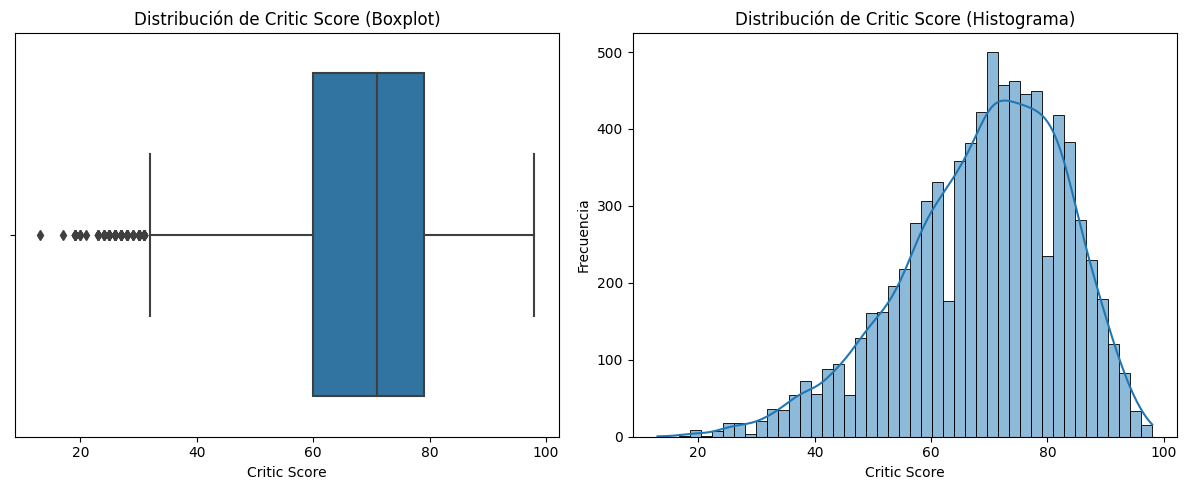

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64


In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot (axes[0])
sns.boxplot(x=df_ice['critic_score'], ax=axes[0])
axes[0].set_title('Distribución de Critic Score (Boxplot)')
axes[0].set_xlabel('Critic Score')

# Histograma (axes[1])
# Usamos dropna para excluir los nulos y kde=True para una estimación de densidad
# ya que los valores nulos afectan la gráfica.
sns.histplot(df_ice['critic_score'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribución de Critic Score (Histograma)')
axes[1].set_xlabel('Critic Score')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

print(df_ice['critic_score'].describe())

Concluyo que la mejor aproximación sería la mediana, ya que en el boxplot aparecen varios valores atípicos
y el histograma refiere a que la distribución está sesgada hacia la izquierda. Esto quiere decir que la media
y la moda son más susceptibles a estos valores.
Por estas razones excluyo la media y la moda


Por otro lado, al ser aproximadamente el 50% de los datos, imputarlos podría convertirlos en valores ficticios. Por lo tanto, como decisión final, dejaré los datos así hasta las pruebas de hipótesis, donde duplicaré las pruebas de hipótesis: una donde mantendré los valores no nulos hasta esa parte del proyecto y la otra con los valores nulos imputados para verificar si tiene un impacto en las pruebas. Aplicaré el mismo sistema para 'user_score' y 'rating'.

In [20]:
# Se genera una copia para conservar los cambios hechos hasta este punto y su posterior análisis.
df_ice_imputado = df_ice.copy()

# Se eliminan los valores nulos
df_ice = df_ice.dropna(subset = ['critic_score'])

print(df_ice['critic_score'].isna().sum())
df_ice.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7983 entries, 0 to 16705
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7983 non-null   object 
 1   platform         7983 non-null   object 
 2   year_of_release  7983 non-null   int64  
 3   genre            7983 non-null   object 
 4   na_sales         7983 non-null   float64
 5   eu_sales         7983 non-null   float64
 6   jp_sales         7983 non-null   float64
 7   other_sales      7983 non-null   float64
 8   critic_score     7983 non-null   float64
 9   user_score       7950 non-null   object 
 10  rating           7902 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 748.4+ KB


### user_score

In [21]:
print(f"Valores nulos: {df_ice['user_score'].isna().sum()}")
print(f"Valores no nulos: {df_ice['user_score'].notna().sum()}")

Valores nulos: 33
Valores no nulos: 7950


Estos porcentajes fueron estimados antes de limpiar la columna ['critic_score']

Porcentaje de nulos = (6605 / 16444) * 100 

Porcentaje de nulos ≈ 40.16%

Los valores TDB serán cambiados por NaN debido a que no aportan información

In [22]:
# Se cambian los valores 'tba' por valores nulos
df_ice['user_score'] = df_ice['user_score'].replace('tbd', pd.NA)
# Se cambia la fila a tipo float64
df_ice['user_score'] = pd.to_numeric(df_ice['user_score'], errors='coerce')

# Se remueven los valores nulos
df_ice = df_ice.dropna(subset = ['user_score'])

print(df_ice['user_score'].isna().sum())
df_ice.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6894 entries, 0 to 16705
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6894 non-null   object 
 1   platform         6894 non-null   object 
 2   year_of_release  6894 non-null   int64  
 3   genre            6894 non-null   object 
 4   na_sales         6894 non-null   float64
 5   eu_sales         6894 non-null   float64
 6   jp_sales         6894 non-null   float64
 7   other_sales      6894 non-null   float64
 8   critic_score     6894 non-null   float64
 9   user_score       6894 non-null   float64
 10  rating           6826 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 646.3+ KB


### rating

In [23]:
print(f"Valores nulos: {df_ice['rating'].isna().sum()}")
print(f"Valores no nulos: {df_ice['rating'].notna().sum()}")

Valores nulos: 68
Valores no nulos: 6826


Estos porcentajes fueron estimados antes de limpiar la columna ['critic_score']

Porcentaje de nulos = (6766 / 16715) * 100 

Porcentaje de nulos ≈ 40.47%

In [24]:
# Se genera la limpieza
df_ice = df_ice.dropna(subset=['rating'])

print(df_ice['rating'].sample(5))
df_ice.info()

7981     M
1364     M
6492     E
1485     M
10172    T
Name: rating, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6826 entries, 0 to 16702
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6826 non-null   object 
 1   platform         6826 non-null   object 
 2   year_of_release  6826 non-null   int64  
 3   genre            6826 non-null   object 
 4   na_sales         6826 non-null   float64
 5   eu_sales         6826 non-null   float64
 6   jp_sales         6826 non-null   float64
 7   other_sales      6826 non-null   float64
 8   critic_score     6826 non-null   float64
 9   user_score       6826 non-null   float64
 10  rating           6826 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 639.9+ KB


### Cálculo ventas totales

Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [25]:
df_ice['total_sales'] = (df_ice['na_sales']
                         + df_ice['eu_sales']
                         + df_ice['jp_sales']
                         + df_ice['other_sales']
                        )  
df_ice.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9331,FIFA Street 2,PSP,2006,Sports,0.07,0.05,0.00,0.02,58.0,6.9,E,0.14
6111,Hatsune Miku: Project Diva f,PS3,2013,Misc,0.08,0.00,0.19,0.02,73.0,8.4,T,0.29
10074,MLB 13: The Show,PSV,2013,Sports,0.10,0.00,0.00,0.02,75.0,7.5,E,0.12
3675,CrossworDS,DS,2008,Puzzle,0.50,0.00,0.00,0.04,67.0,6.8,E,0.54
830,Need For Speed: Undercover,PS3,2008,Racing,0.63,1.00,0.05,0.38,59.0,5.9,T,2.06


---
---

## Paso 3. Analiza los datos

### Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

1985      1
1988      1
1992      1
1994      1
1996      7
1997     13
1998     25
1999     30
2000    102
2001    256
2002    455
2003    498
2004    476
2005    562
2006    528
2007    590
2008    592
2009    550
2010    429
2011    454
2012    313
2013    266
2014    253
2015    211
2016    212
Name: year_of_release, dtype: int64


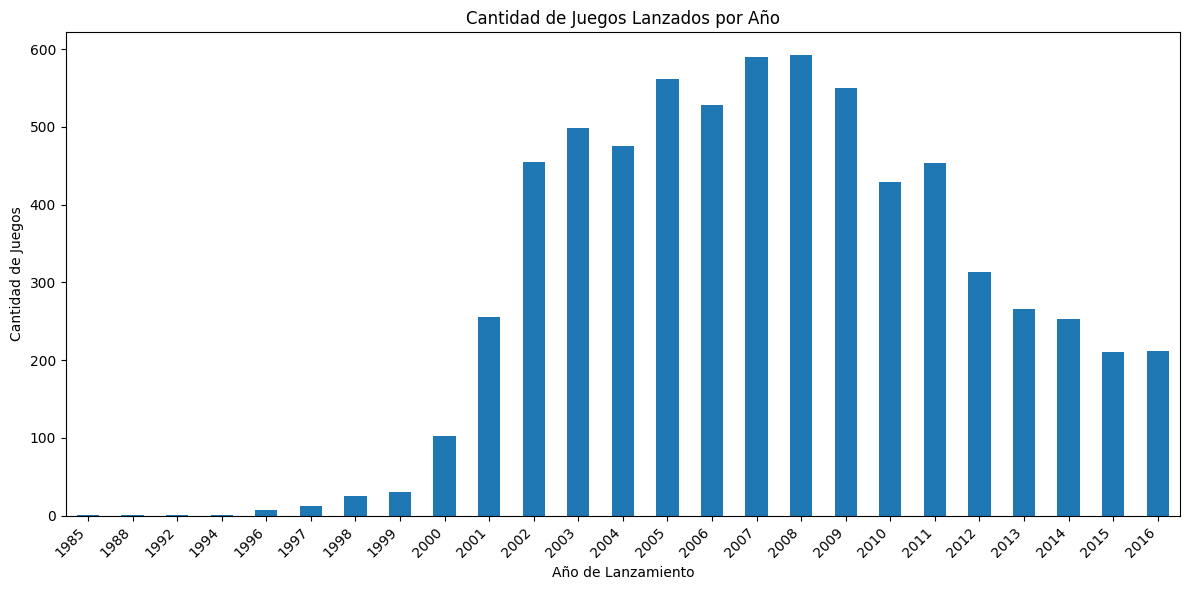

In [26]:
games_by_year = df_ice['year_of_release'].value_counts().sort_index()
print(games_by_year)

games_by_year.plot(kind='bar', figsize=(12, 6))
plt.title('Cantidad de Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Sí, existe un periodo significativo entre el año 2000 y 2011, una década en la que los lanzamientos se dispararon. En contraste, el crecimiento entre 1985 y 1999 fue escaso. Del año 2012 al 2016, el número de lanzamientos se mantuvo en un promedio con una tendencia a la baja.

---

### Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

platform
PS2     946.01
X360    853.24
PS3     784.45
Wii     658.97
DS      382.22
PS4     243.00
XB      211.93
PS      206.65
PSP     187.68
PC      186.71
GC      159.25
GBA     131.70
XOne    129.48
3DS     123.22
WiiU     66.08
PSV      30.83
DC        4.55
Name: total_sales, dtype: float64


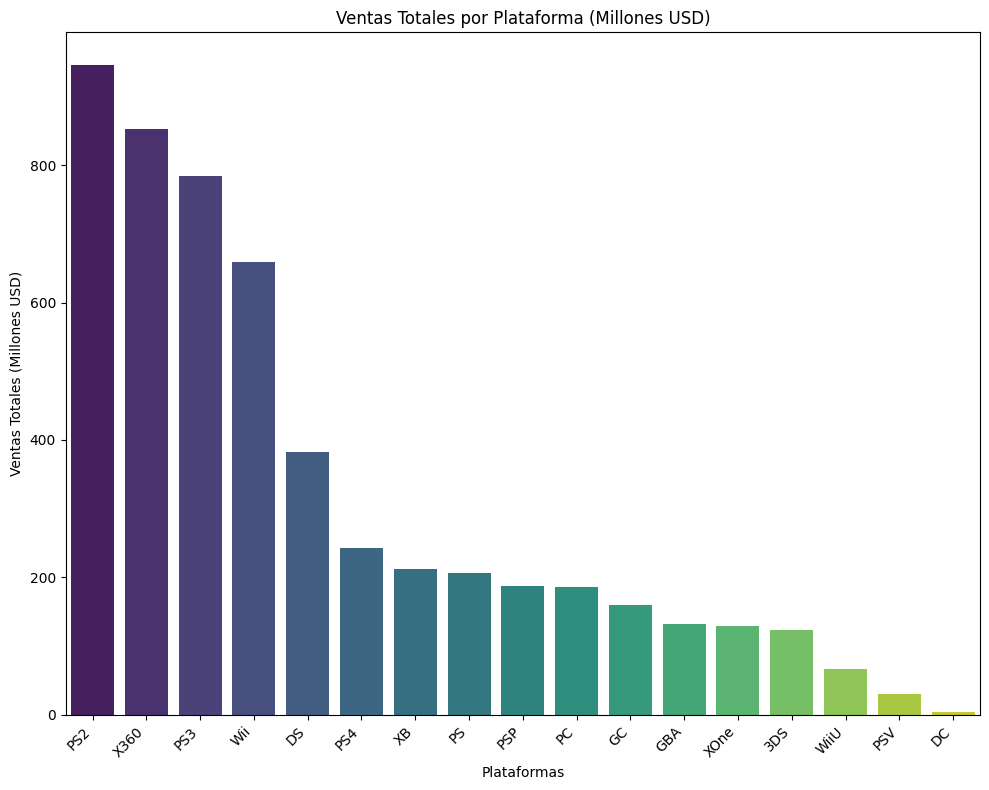

In [27]:
# 1.- Ventas totales por plataforma.
sells_by_platform = df_ice.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False)
print(sells_by_platform)

# 1.1- Barplot para ver las plataformas con más ventas
plt.figure(figsize=(10,8))
sns.barplot(x = sells_by_platform.index,
            y = sells_by_platform.values,                       
            palette = 'viridis')
plt.xlabel('Plataformas')
plt.ylabel('Ventas Totales (Millones USD)')
plt.title('Ventas Totales por Plataforma (Millones USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

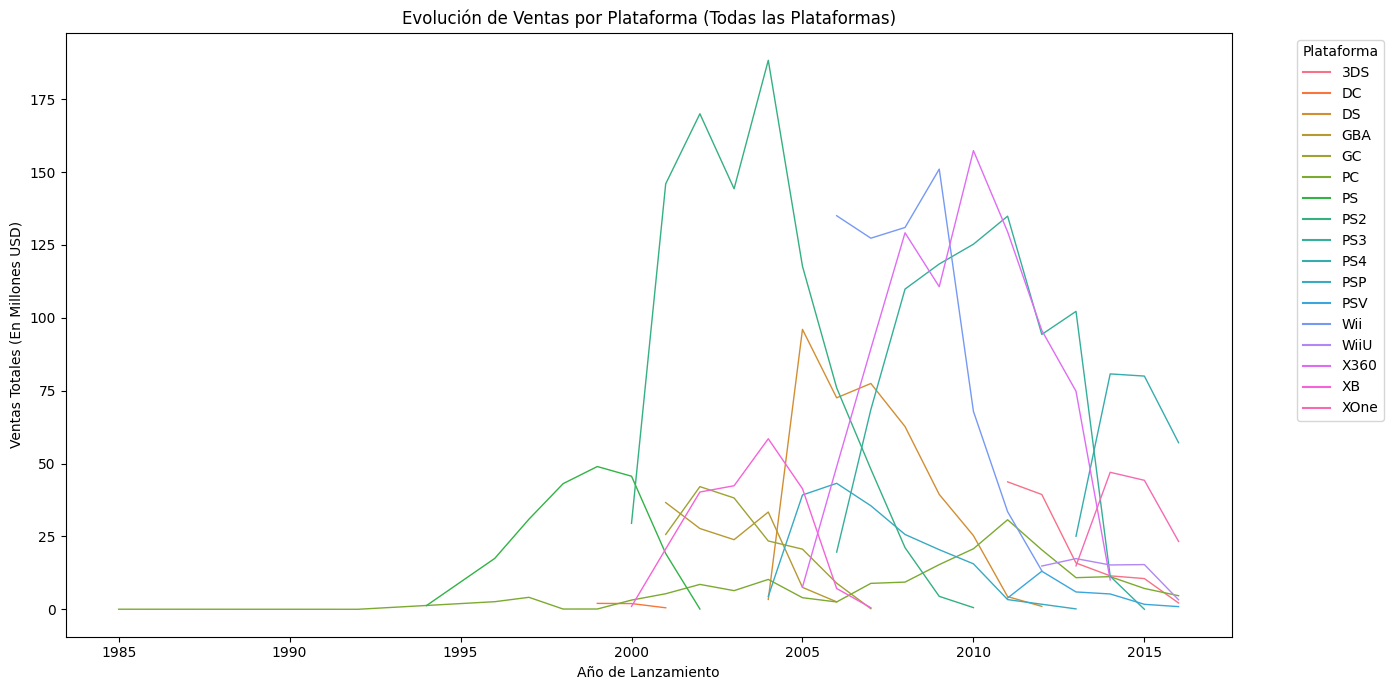

In [28]:
# 2.- Agrupar todas las plataformas por año y sumar las ventas
df_grouped = df_ice.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()


# 2.1- Lineplot para ver evolución en el tiempo por plataforma
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_grouped, 
             x='year_of_release', 
             y='total_sales', 
             hue='platform', 
             linewidth=1)
plt.title("Evolución de Ventas por Plataforma (Todas las Plataformas)")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Ventas Totales (En Millones USD)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Plataforma')
plt.tight_layout()
plt.show()


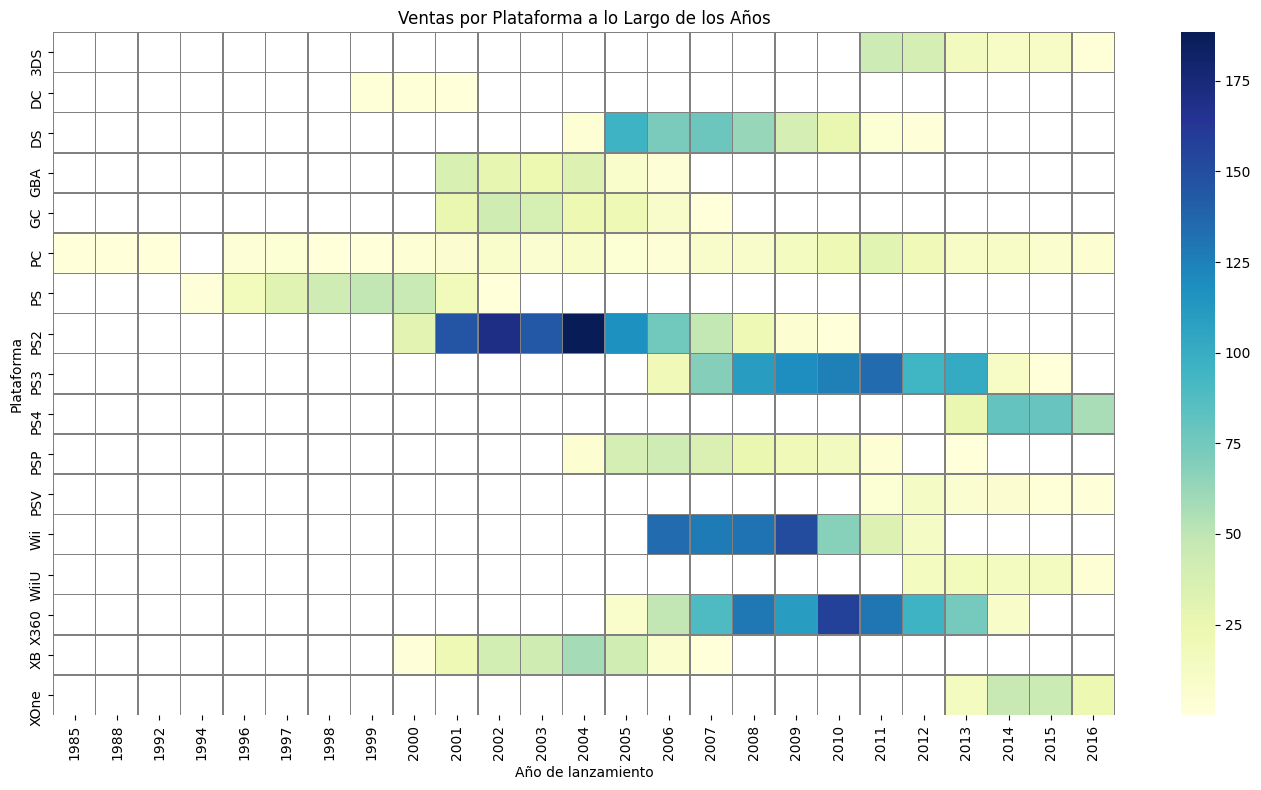

In [29]:
# 3.- Ventas por plataforma y año
pivot_ended = df_grouped.pivot(index='year_of_release', 
                         columns='platform', 
                         values='total_sales')


# 3.1- Heatmap ventas por plataforma y año
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_ended.T, 
            cmap='YlGnBu', 
            linewidths=0.3, 
            linecolor='gray')
plt.title('Ventas por Plataforma a lo Largo de los Años')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Plataforma')
plt.tight_layout()
plt.show()


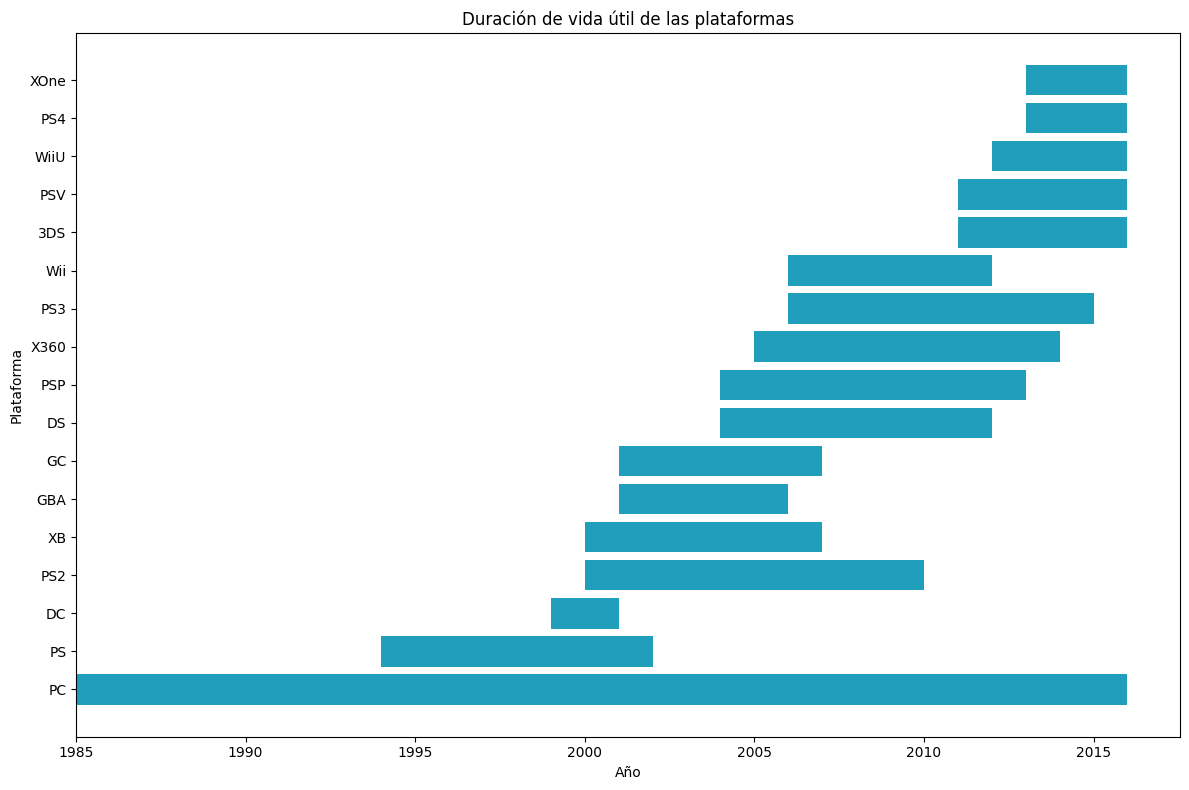

In [30]:
# 4.- Vida útil de cada plataforma: aparición, desaparición y duración
vida_util = df_grouped.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
vida_util['duración'] = vida_util['max'] - vida_util['min']
vida_util = vida_util.rename(columns={'min': 'year_appearance', 'max': 'year_disappearance'})


# 4.1- Diagrama de Gantt: duración de vida de cada plataforma
vida_util_sorted = vida_util.sort_values(by='year_appearance')

plt.figure(figsize=(12, 8))
for i, row in vida_util_sorted.iterrows():
    plt.barh(row['platform'], 
             row['duración'], 
             left=row['year_appearance'], 
             color='#219ebc')
plt.xlabel('Año')
plt.ylabel('Plataforma')
plt.title('Duración de Vida Útil de las Plataformas')
plt.tight_layout()
plt.show()

In [31]:
# 5.- Identificar plataformas que ya no tienen ventas en el año más reciente
last_year = df_ice['year_of_release'].max()
plataformas_muertas = vida_util[vida_util['year_disappearance'] < last_year]

print("\n" + "=" * 60)

# 5.1- Vida útil de plataformas ordenadas por aparición
print("Vida útil de las plataformas:")
print(vida_util.sort_values(by='year_disappearance'))

print("\n" + "=" * 60)
print(" ")
print(" ")
print("\n" + "=" * 60)




Vida útil de las plataformas:
   platform  year_appearance  year_disappearance  duración
1        DC             1999                2001         2
6        PS             1994                2002         8
3       GBA             2001                2006         5
4        GC             2001                2007         6
15       XB             2000                2007         7
7       PS2             2000                2010        10
2        DS             2004                2012         8
12      Wii             2006                2012         6
10      PSP             2004                2013         9
14     X360             2005                2014         9
8       PS3             2006                2015         9
13     WiiU             2012                2016         4
0       3DS             2011                2016         5
9       PS4             2013                2016         3
5        PC             1985                2016        31
11      PSV             2

In [32]:
# 6.-
print("Plataformas que ya no tienen ventas desde antes de", last_year, ":")
print(plataformas_muertas[['platform', 'year_disappearance']])

print("\n" + "=" * 60)

Plataformas que ya no tienen ventas desde antes de 2016 :
   platform  year_disappearance
1        DC                2001
2        DS                2012
3       GBA                2006
4        GC                2007
6        PS                2002
7       PS2                2010
8       PS3                2015
10      PSP                2013
12      Wii                2012
14     X360                2014
15       XB                2007



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Excelente análisis exploratorio. Has utilizado visualizaciones potentes y variadas para identificar patrones de ventas, evolución temporal por plataforma y duración de vida útil. La combinación de gráficos de líneas, mapas de calor y diagramas de Gantt aporta una visión integral y clara del comportamiento histórico del mercado de videojuegos. </div>

---

### Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

In [33]:
# Se crea una máscara y un nuevo dataframe a partir de los nuevos datos
mask = (df_ice['year_of_release']>=2012) & (df_ice['year_of_release'] <=2016)
df_ice_2017 = df_ice[mask].copy()

print(df_ice_2017['year_of_release'].unique())
df_ice_2017.sample(5)

[2013 2012 2014 2015 2016]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14737,Ride,PC,2015,Racing,0.00,0.03,0.00,0.00,68.0,4.8,E,0.03
1658,WWE 2K16,PS4,2015,Sports,0.41,0.60,0.00,0.20,73.0,7.4,T,1.21
2137,Evolve,PS4,2015,Shooter,0.36,0.41,0.05,0.15,76.0,4.3,M,0.97
1798,Sunset Overdrive,XOne,2014,Shooter,0.63,0.40,0.00,0.10,81.0,7.7,M,1.13
4017,F1 2012,X360,2012,Racing,0.10,0.34,0.00,0.05,84.0,6.9,E,0.49


En función del análisis integral de los datos disponibles, se determina que una proyección para el año 2017 debe basarse en la información comprendida dentro de los cuatro años anteriores. Esta ventana temporal, 2012-2016, se considera representativa del ciclo de vida medio de una plataforma de videojuegos, lo que permite capturar tendencias relevantes para la proyección.

---

### Agrupación por marca (Este punto no aparece en el proyecto)
Con el objetivo de obtener una visión más amplia y evitar la fragmentación de los datos, la siguiente etapa del análisis se centrará en agrupar las plataformas bajo sus respectivas marcas. Implementaré esta agrupación a continuación.

In [34]:
df_ice_2017['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'WiiU', 'Wii', 'XOne', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [35]:
brand_dict = {
    'PS3': 'Sony',
    'PS4': 'Sony',
    'PSV': 'Sony',
    'PSP': 'Sony',
    'X360': 'Microsoft',
    'XOne': 'Microsoft',
    'DS': 'Nintendo',
    '3DS': 'Nintendo',
    'WiiU': 'Nintendo',
    'Wii': 'Nintendo',
    'PC': 'PC'
}

def clasificar_plataforma(plataforma):
    return brand_dict.get(plataforma, 'Otro') # por si no encuentra la plataforma.

# Creamos una nueva columna.
df_ice_2017['brand'] = df_ice_2017['platform'].apply(clasificar_plataforma)

df_ice_2017['brand'].unique()

array(['Sony', 'Microsoft', 'Nintendo', 'PC'], dtype=object)

In [36]:
df_ice_2017.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,brand
1765,Medal of Honor: Warfighter,X360,2012,Action,0.59,0.45,0.01,0.10,53.0,5.4,M,1.15,Microsoft
462,Mass Effect 3,X360,2012,Role-Playing,1.94,0.84,0.03,0.24,93.0,5.8,M,3.05,Microsoft
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39,Sony
9035,Alien: Isolation,PC,2014,Shooter,0.00,0.14,0.00,0.01,81.0,8.4,M,0.15,PC
14011,Ray Gigant,PSV,2015,Role-Playing,0.00,0.00,0.04,0.00,72.0,8.1,T,0.04,Sony


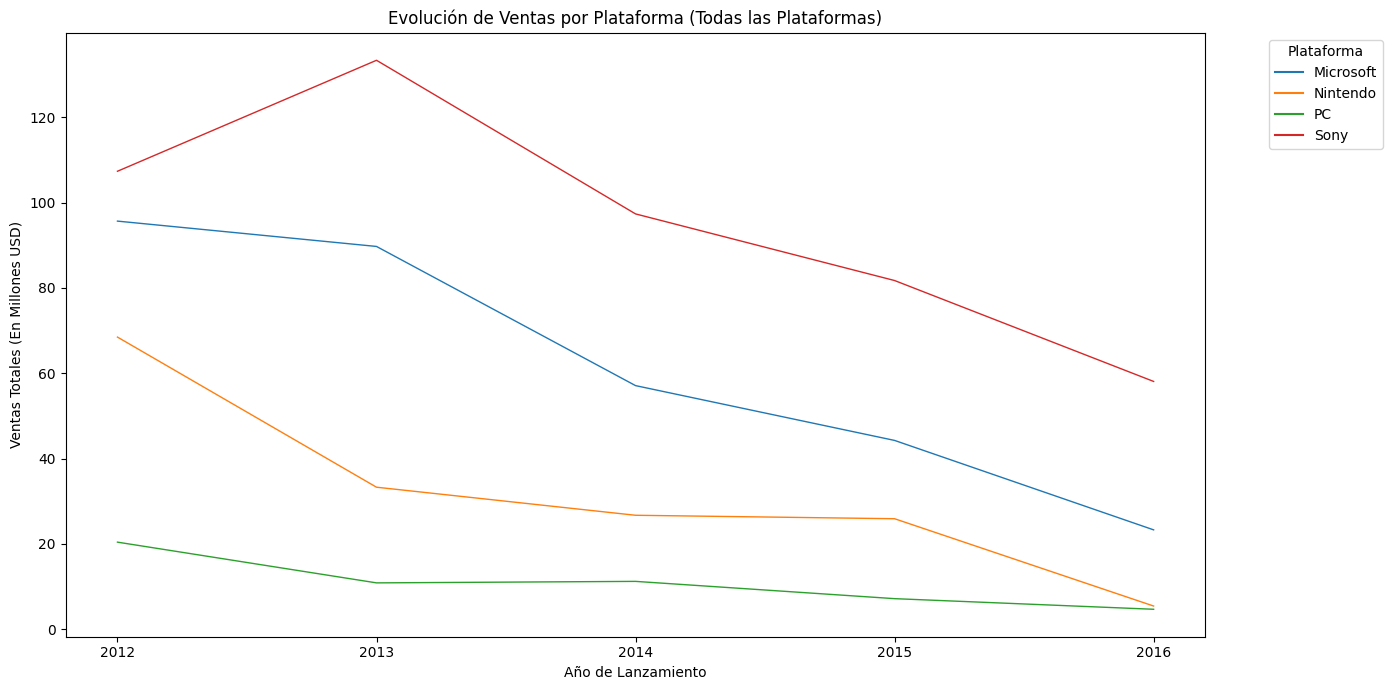

In [37]:
df_grouped_2017 = df_ice_2017.groupby(['brand', 'year_of_release'])['total_sales'].sum().reset_index()



# 2.1- Lineplot para ver evolución en el tiempo por plataforma
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_grouped_2017, 
             x='year_of_release', 
             y='total_sales', 
             hue='brand', 
             linewidth=1)
plt.title("Evolución de Ventas por Plataforma (Todas las Plataformas)")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Ventas Totales (En Millones USD)")
plt.xticks(range(2012, 2017, 1))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Plataforma')
plt.tight_layout()
plt.show()

---

### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

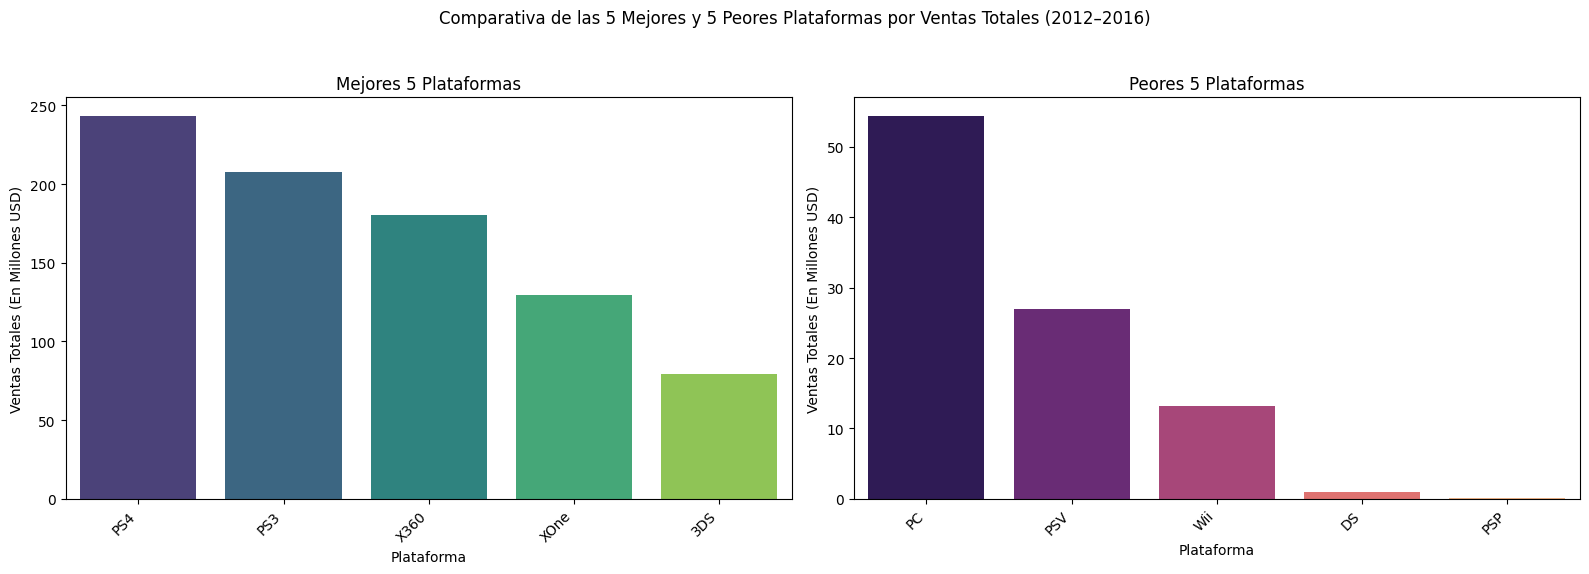

In [38]:
platforms_2017 = df_ice_2017.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platforms_2017_best = platforms_2017.head(5)
platforms_2017_worse = platforms_2017.tail(5)

#platforms_2017_best = platforms_2017.nlargest(5)
#platforms_2017_worse = platforms_2017.nsmallest(5)



fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Comparativa de las 5 Mejores y 5 Peores Plataformas por Ventas Totales (2012–2016)')

# Gráfico de las 5 mejores plataformas
sns.barplot(x=platforms_2017_best.index, y=platforms_2017_best.values, ax=axes[0], palette='viridis')
axes[0].set_title('Mejores 5 Plataformas')
axes[0].set_xlabel('Plataforma')
axes[0].set_ylabel('Ventas Totales (En Millones USD)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Gráfico de las 5 peores plataformas
sns.barplot(x=platforms_2017_worse.index, y=platforms_2017_worse.values, ax=axes[1], palette='magma')
axes[1].set_title('Peores 5 Plataformas')
axes[1].set_xlabel('Plataforma')
axes[1].set_ylabel('Ventas Totales (En Millones USD)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

La inspección de los dos gráficos previos pone de manifiesto una correlación en las tendencias de crecimiento. Independientemente de la categorización (marca versus plataforma), se identifica un comportamiento similar, con las plataformas de las marcas líderes destacando por su rendimiento superior. No obstante, el caso de "PC" representa una excepción notable, evidenciando un crecimiento comparativamente lento, inferior incluso al de la plataforma "3DS", que ocupa el quinto lugar en rendimiento.

---

### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

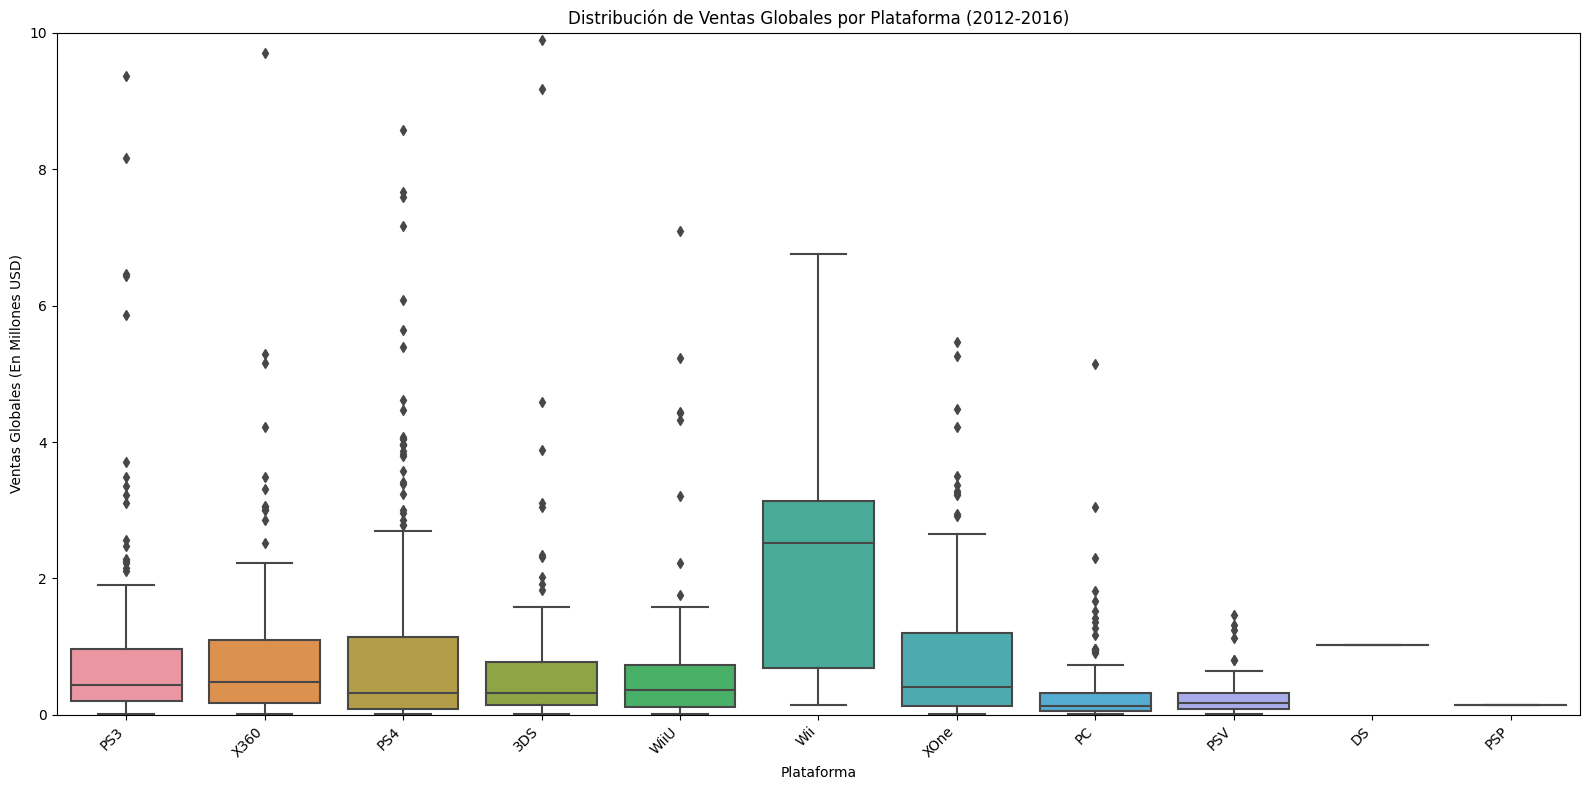

In [39]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='platform', y='total_sales', data=df_ice_2017)
plt.title('Distribución de Ventas Globales por Plataforma (2012-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (En Millones USD)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0,10)
plt.tight_layout()
plt.show()


La visualización gráfica revela una concentración de la mayoría de los datos en torno al valor medio, lo que sugiere una homogeneidad relativa entre las observaciones y una ausencia de variaciones sustanciales. La plataforma "Wii" se identifica como la única instancia que exhibe una desviación notable del patrón general, constituyendo un valor atípico en comparación con el comportamiento similar manifestado por el resto de las plataformas.

---

### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

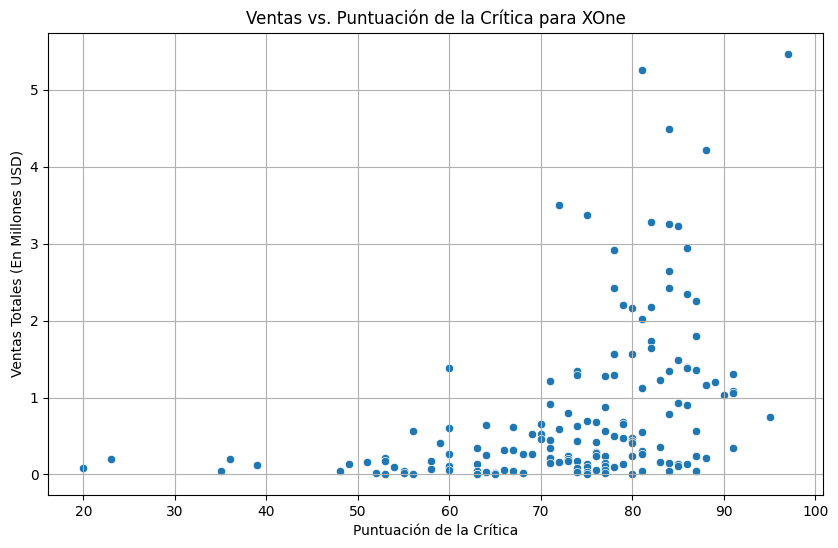

Correlación entre Puntuación de la Crítica y Ventas para XOne: 0.41


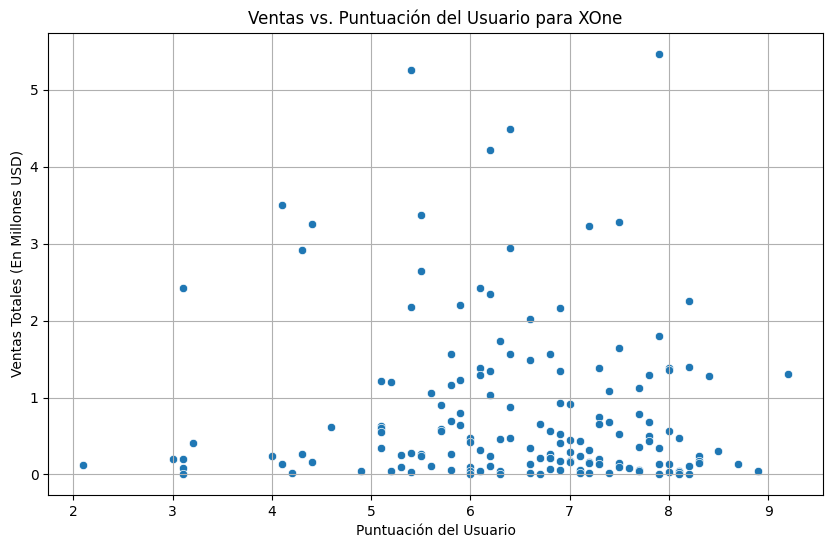

Correlación entre Puntuación del Usuario y Ventas para XOne: -0.08


In [40]:
# Elegimos la plataforma 'XOne'
df_xone = df_ice_2017[df_ice_2017['platform']=='XOne']


# Gráfico de dispersión: Ventas vs. Critic Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=df_xone)
plt.title(f'Ventas vs. Puntuación de la Crítica para XOne')
plt.xlabel('Puntuación de la Crítica')
plt.ylabel('Ventas Totales (En Millones USD)')
plt.grid(True)
plt.show()

# Calcular la correlación entre Critic Score y Ventas
correlation_critic = df_xone['critic_score'].corr(df_xone['total_sales'])
print(f'Correlación entre Puntuación de la Crítica y Ventas para XOne: {correlation_critic:.2f}')

# Gráfico de dispersión: Ventas vs. User Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=df_xone)
plt.title(f'Ventas vs. Puntuación del Usuario para XOne')
plt.xlabel('Puntuación del Usuario')
plt.ylabel('Ventas Totales (En Millones USD)')
plt.grid(True)
plt.show()

# Calcular la correlación entre User Score y Ventas
correlation_user = df_xone['user_score'].corr(df_xone['total_sales'])
print(f'Correlación entre Puntuación del Usuario y Ventas para XOne: {correlation_user:.2f}')

El coeficiente de correlación de Pearson entre la "Puntuación del Usuario" y las ventas de la plataforma XOne arrojó un valor de -0.08. Este resultado denota una correlación negativa de baja magnitud, lo que implica una ausencia de relación lineal significativa entre ambas variables.

---

### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

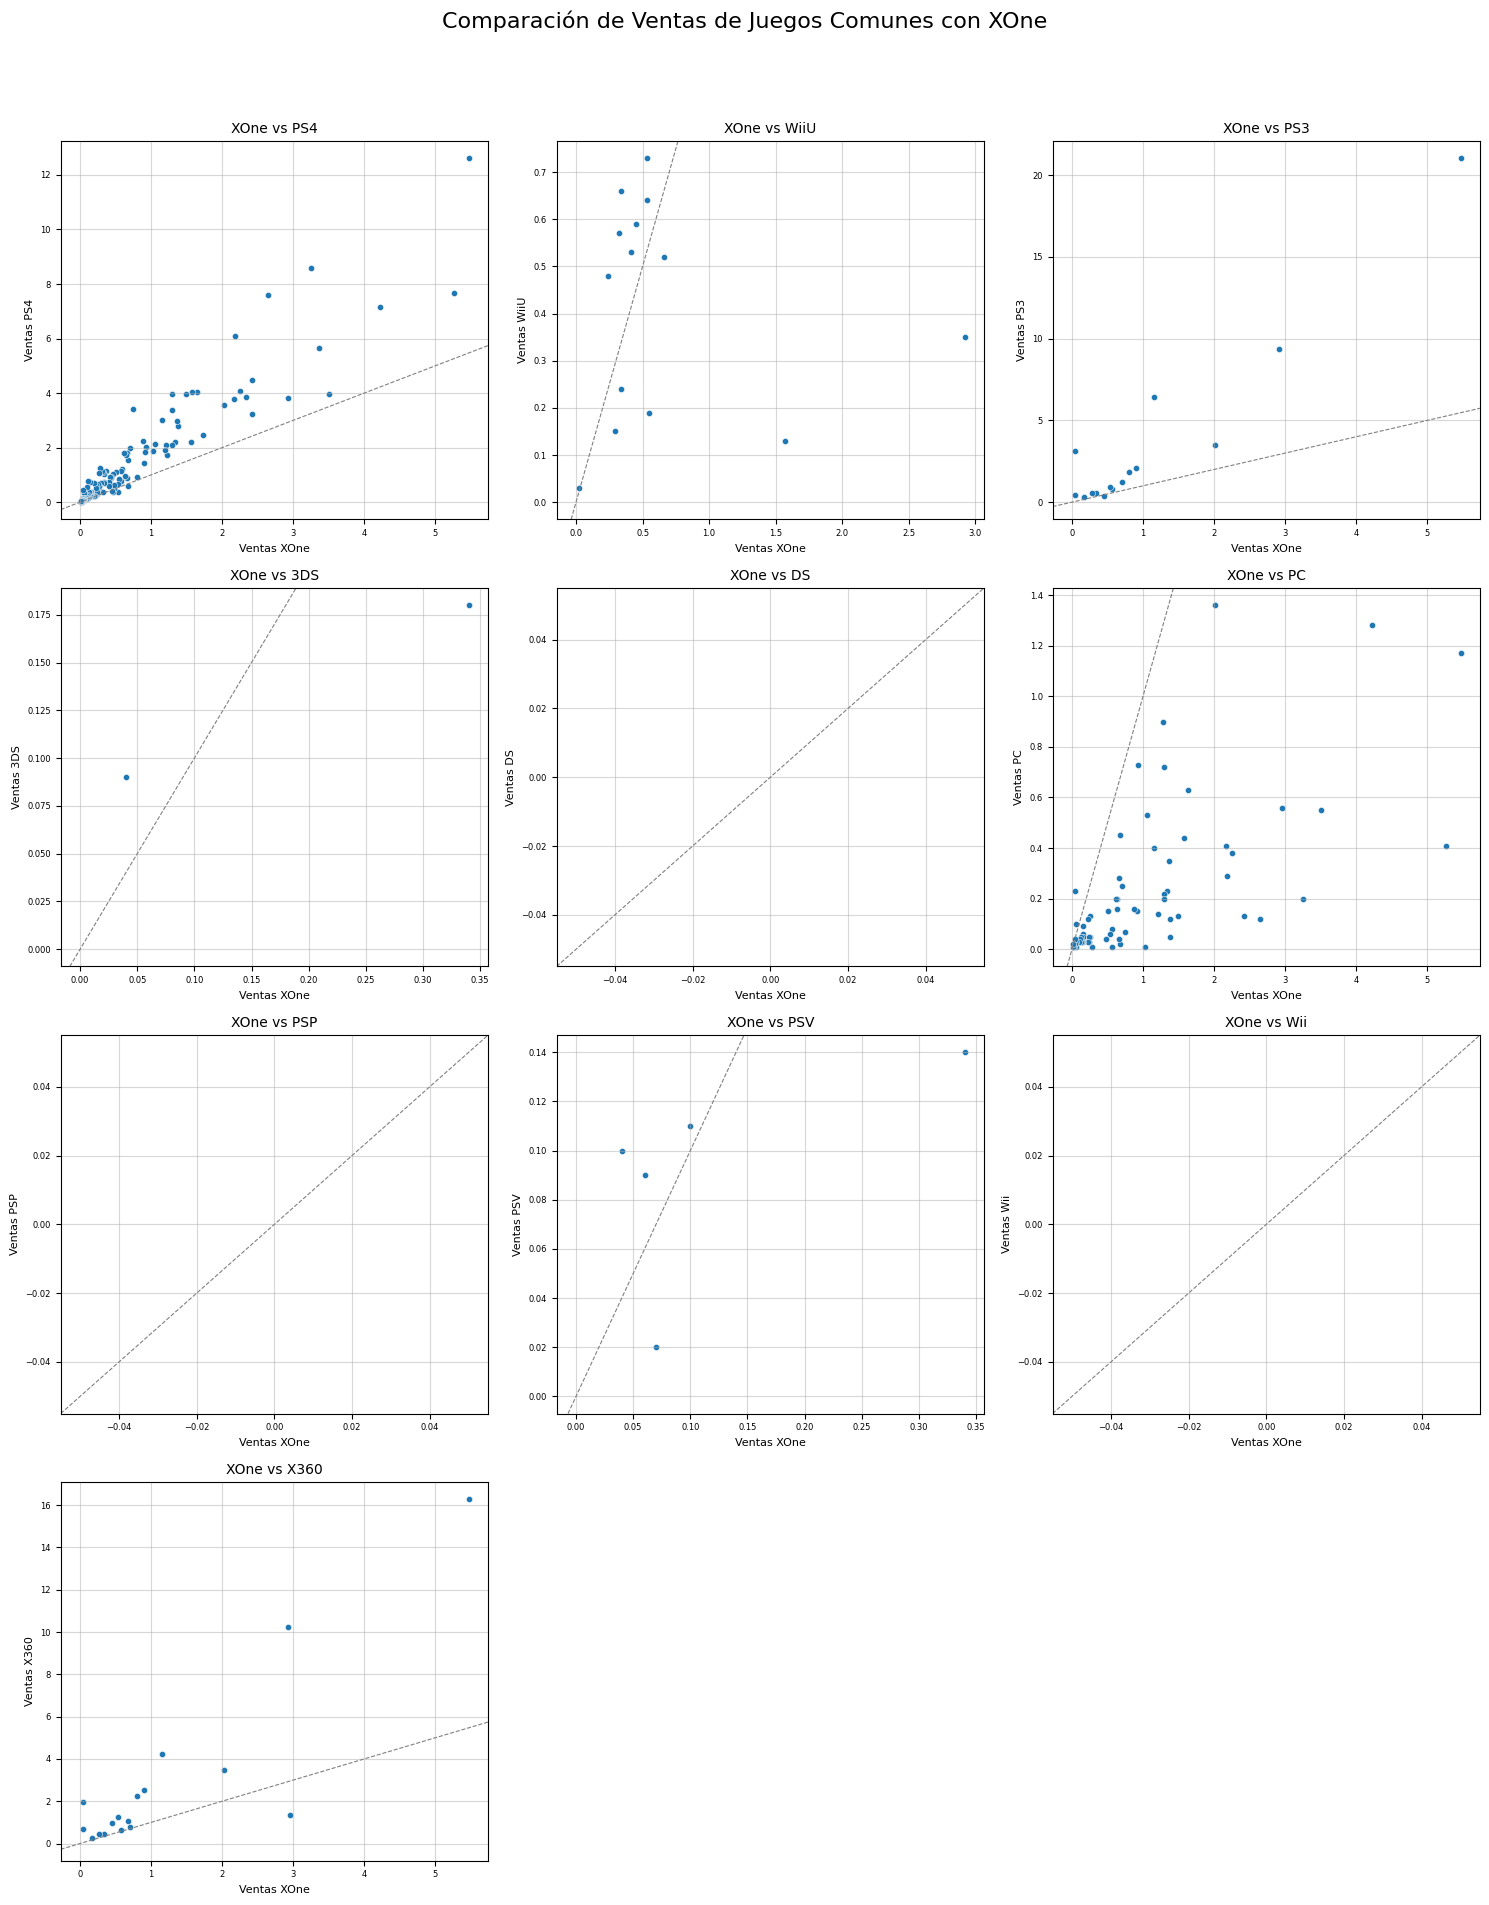

In [51]:
plataforma_base = 'XOne'
plataformas_comparacion = ['PS4', 'WiiU', 'PS3', '3DS', 'DS', 'PC', 'PSP', 'PSV', 'Wii', 'X360']
df_xone = df_ice_2017[df_ice_2017['platform'] == plataforma_base].copy()

num_comparaciones = len(plataformas_comparacion)
num_filas = (num_comparaciones + 2) // 3  
num_columnas = min(num_comparaciones, 3)

fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))
fig.suptitle(f'Comparación de Ventas de Juegos Comunes con {plataforma_base}', fontsize=16)

# Aplanar la matriz de ejes para facilitar la iteración
axes = axes.flatten()


for i, plataforma_comp in enumerate(plataformas_comparacion):
    df_comp = df_ice_2017[df_ice_2017['platform'] == plataforma_comp].copy()
    juegos_comunes = pd.merge(df_xone[['name']], df_comp[['name']], on='name', how='inner')['name'].tolist()
    df_xone_comun = df_xone[df_xone['name'].isin(juegos_comunes)].copy()
    df_comp_comun = df_comp[df_comp['name'].isin(juegos_comunes)].copy()

    df_comparacion = pd.merge(df_xone_comun[['name', 'total_sales']],
                               df_comp_comun[['name', 'total_sales']],
                               on='name',
                               suffixes=(f'_{plataforma_base}', f'_{plataforma_comp}'),  # Corrección aquí
                               how='inner')

    df_comparacion.rename(columns={'total_sales_XOne': f'Ventas_{plataforma_base}',
                                   f'total_sales_{plataforma_comp}': f'Ventas_{plataforma_comp}'},
                          inplace=True)


    sns.scatterplot(x=f'Ventas_{plataforma_base}', y=f'Ventas_{plataforma_comp}', data=df_comparacion, ax=axes[i], s=20)
    axes[i].set_title(f'{plataforma_base} vs {plataforma_comp}', fontsize=10)
    axes[i].set_xlabel(f'Ventas {plataforma_base}', fontsize=8)
    axes[i].set_ylabel(f'Ventas {plataforma_comp}', fontsize=8)
    axes[i].tick_params(labelsize=6)
    axes[i].grid(True, alpha=0.5)
    axes[i].axline((0, 0), slope=1, color='gray', linestyle='--', linewidth=0.8) 

if num_comparaciones < len(axes):
    for j in range(num_comparaciones, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Para esta parte hago las comparaciones globales de las marcas para poder dar un mejor analisis

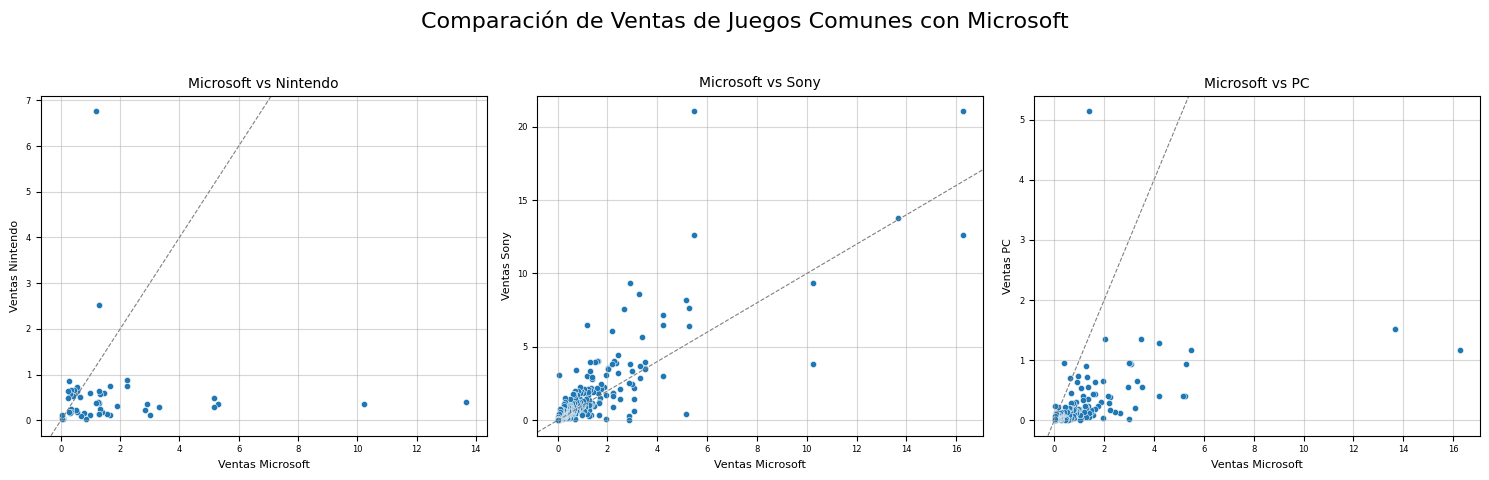

In [42]:
marca_base = 'Microsoft'
marcas_comparacion = ['Nintendo', 'Sony', 'PC']
df_marca_base = df_ice_2017[df_ice_2017['brand'] == marca_base].copy()


num_comparaciones = len(marcas_comparacion)
num_filas = (num_comparaciones + 2) // 3  
num_columnas = min(num_comparaciones, 3)

fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))
fig.suptitle(f'Comparación de Ventas de Juegos Comunes con {marca_base}', fontsize=16)

# Aplanar la matriz de ejes para facilitar la iteración
axes = axes.flatten()


for i, marca_comp in enumerate(marcas_comparacion):
    df_comp = df_ice_2017[df_ice_2017['brand'] == marca_comp].copy()
    juegos_comunes = pd.merge(df_marca_base[['name']], df_comp[['name']], on='name', how='inner')['name'].tolist()
    df_marca_base_comun = df_marca_base[df_marca_base['name'].isin(juegos_comunes)].copy()
    df_comp_comun = df_comp[df_comp['name'].isin(juegos_comunes)].copy()
    df_comparacion = pd.merge(df_marca_base_comun[['name', 'total_sales']],
                               df_comp_comun[['name', 'total_sales']],
                               on='name',
                               suffixes=(f'_{marca_base}', f'_{marca_comp}'),
                               how='inner')
    df_comparacion.rename(columns={f'total_sales_{marca_base}': f'Ventas_{marca_base}',
                                   f'total_sales_{marca_comp}': f'Ventas_{marca_comp}'},
                          inplace=True)


    sns.scatterplot(x=f'Ventas_{marca_base}', y=f'Ventas_{marca_comp}', data=df_comparacion, ax=axes[i], s=20)
    axes[i].set_title(f'{marca_base} vs {marca_comp}', fontsize=10)
    axes[i].set_xlabel(f'Ventas {marca_base}', fontsize=8)
    axes[i].set_ylabel(f'Ventas {marca_comp}', fontsize=8)
    axes[i].tick_params(labelsize=6)
    axes[i].grid(True, alpha=0.5)
    axes[i].axline((0, 0), slope=1, color='gray', linestyle='--', linewidth=0.8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

El análisis comparativo de las ventas de juegos comunes revela que la plataforma "Sony" presenta un volumen de ventas superior en relación con "Microsoft". En contraste, las ventas en "PC" son comparativamente menores. No obstante, es crucial considerar que durante el periodo analizado, una proporción significativa de los juegos de PC podrían haber sido desarrollados por Microsoft, lo que requeriría una investigación más exhaustiva para discernir las dinámicas de mercado subyacentes.

#### 'Comparación de Ventas de Juegos Comunes entre Marcas'

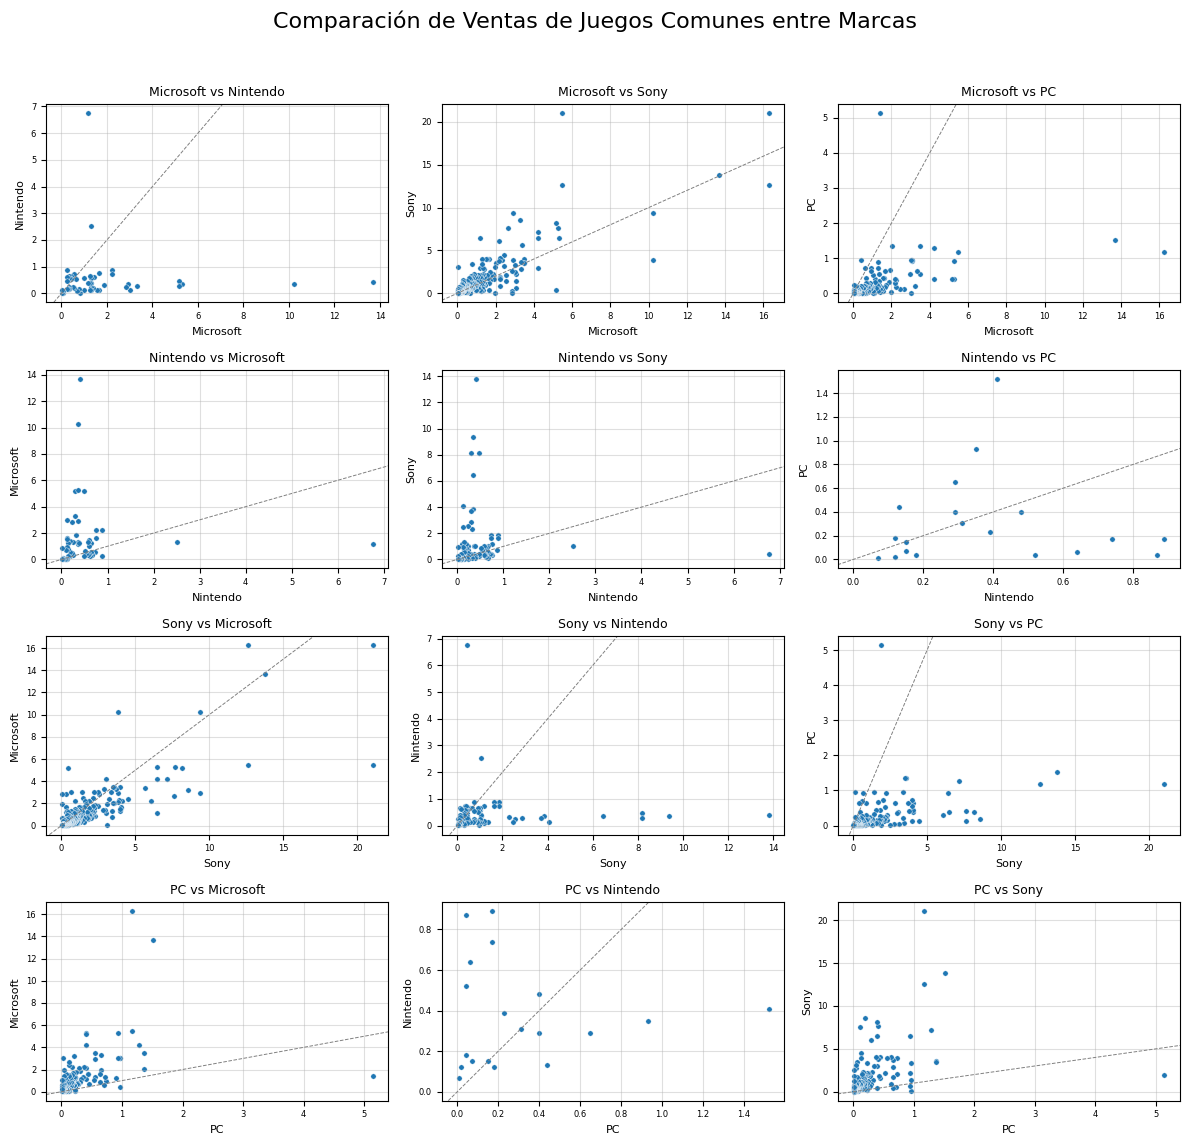

In [105]:
marcas = ['Microsoft', 'Nintendo', 'Sony', 'PC']


fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))
fig.suptitle('Comparación de Ventas de Juegos Comunes entre Marcas', fontsize=16)
for fila, marca_base in enumerate(marcas):
    df_marca_base = df_ice_2017[df_ice_2017['brand'] == marca_base].copy()
    marcas_comparacion = [m for m in marcas if m != marca_base]
    for col, marca_comp in enumerate(marcas_comparacion):
        df_comp = df_ice_2017[df_ice_2017['brand'] == marca_comp].copy()

        juegos_comunes = pd.merge(df_marca_base[['name']], df_comp[['name']], on='name', how='inner')['name'].tolist()
        df_marca_base_comun = df_marca_base[df_marca_base['name'].isin(juegos_comunes)].copy()
        df_comp_comun = df_comp[df_comp['name'].isin(juegos_comunes)].copy()

        df_comparacion = pd.merge(
            df_marca_base_comun[['name', 'total_sales']],
            df_comp_comun[['name', 'total_sales']],
            on='name',
            suffixes=(f'_{marca_base}', f'_{marca_comp}'),
            how='inner'
        )

        df_comparacion.rename(columns={
            f'total_sales_{marca_base}': f'Ventas_{marca_base}',
            f'total_sales_{marca_comp}': f'Ventas_{marca_comp}'
        }, inplace=True)

        ax = axes[fila, col]
        sns.scatterplot(
            x=f'Ventas_{marca_base}',
            y=f'Ventas_{marca_comp}',
            data=df_comparacion,
            ax=ax,
            s=15
        )
        ax.set_title(f'{marca_base} vs {marca_comp}', fontsize=9)
        ax.set_xlabel(f'{marca_base}', fontsize=8)
        ax.set_ylabel(f'{marca_comp}', fontsize=8)
        ax.tick_params(labelsize=6)
        ax.grid(True, alpha=0.4)
        ax.axline((0, 0), slope=1, color='gray', linestyle='--', linewidth=0.7)

    for empty_col in range(len(marcas_comparacion), 3):
        axes[fila, empty_col].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

---

### Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

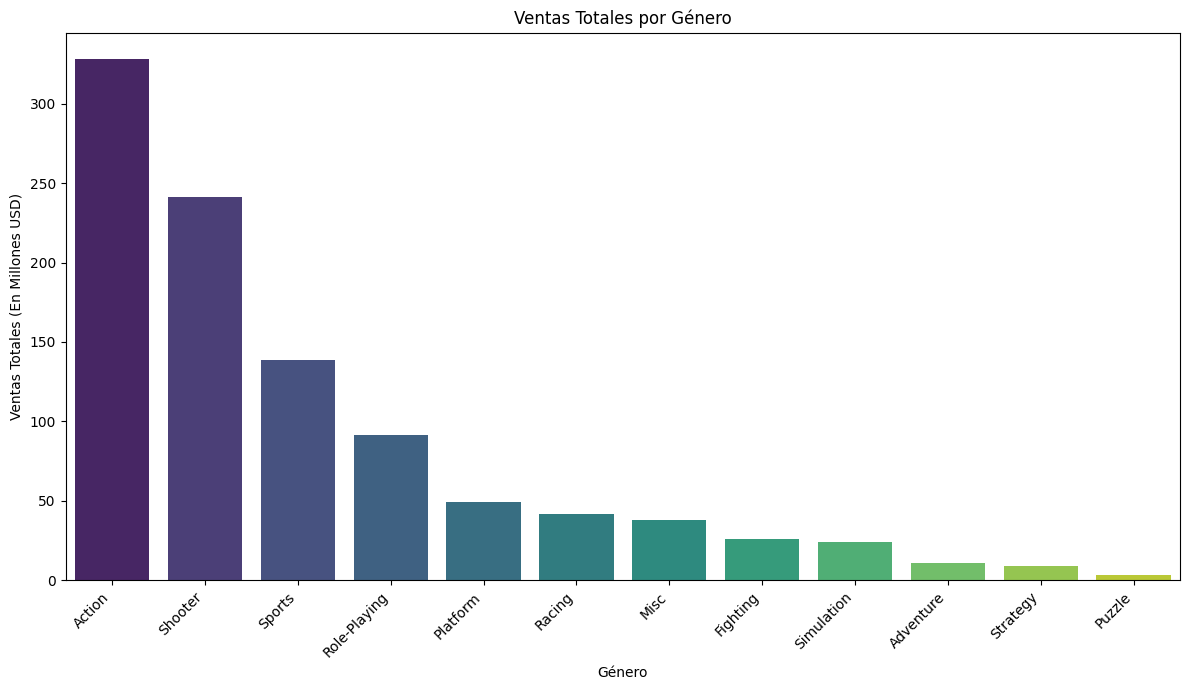


Ventas Totales por Género (en orden descendente):
genre
Action          328.07
Shooter         241.33
Sports          138.75
Role-Playing     91.29
Platform         49.39
Racing           41.56
Misc             37.72
Fighting         26.21
Simulation       24.21
Adventure        11.22
Strategy          9.29
Puzzle            3.14
Name: total_sales, dtype: float64


In [43]:
# Agrupar por género y calcular las ventas totales
ventas_por_genero = df_ice_2017.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=ventas_por_genero.index, y=ventas_por_genero.values, palette='viridis')
plt.title('Ventas Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (En Millones USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nVentas Totales por Género (en orden descendente):")
print(ventas_por_genero)

El análisis de las ventas por género revela que las categorías "Action", "Shooter" y "Sports" presentan los mayores volúmenes de ingresos, excediendo individualmente los 100 millones de dólares. Estos géneros se identifican, por lo tanto, como los de mayor rentabilidad. En contraste, el resto de las categorías analizadas registran cifras de ventas considerablemente inferiores a este umbral.

---
---

## Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

Primero se crea un perfil por zona sea:
   - na = Norte América

   - eu = Unión Europea

   - jp = Japón


Géneros más vendidos en una región


Top Géneros en Norteamérica (NA) (2012-2016):
 genre
Action          139.18
Shooter         115.65
Sports           65.83
Role-Playing     36.47
Platform         20.39
Name: na_sales, dtype: float64

Top Géneros en Europa (EU) (2012-2016):
 genre
Action          126.98
Shooter          89.09
Sports           52.75
Role-Playing     28.23
Racing           20.84
Name: eu_sales, dtype: float64

Top Géneros en Japón (JP) (2012-2016):
 genre
Action          20.87
Role-Playing    17.46
Platform         7.96
Shooter          7.62
Simulation       7.29
Name: jp_sales, dtype: float64


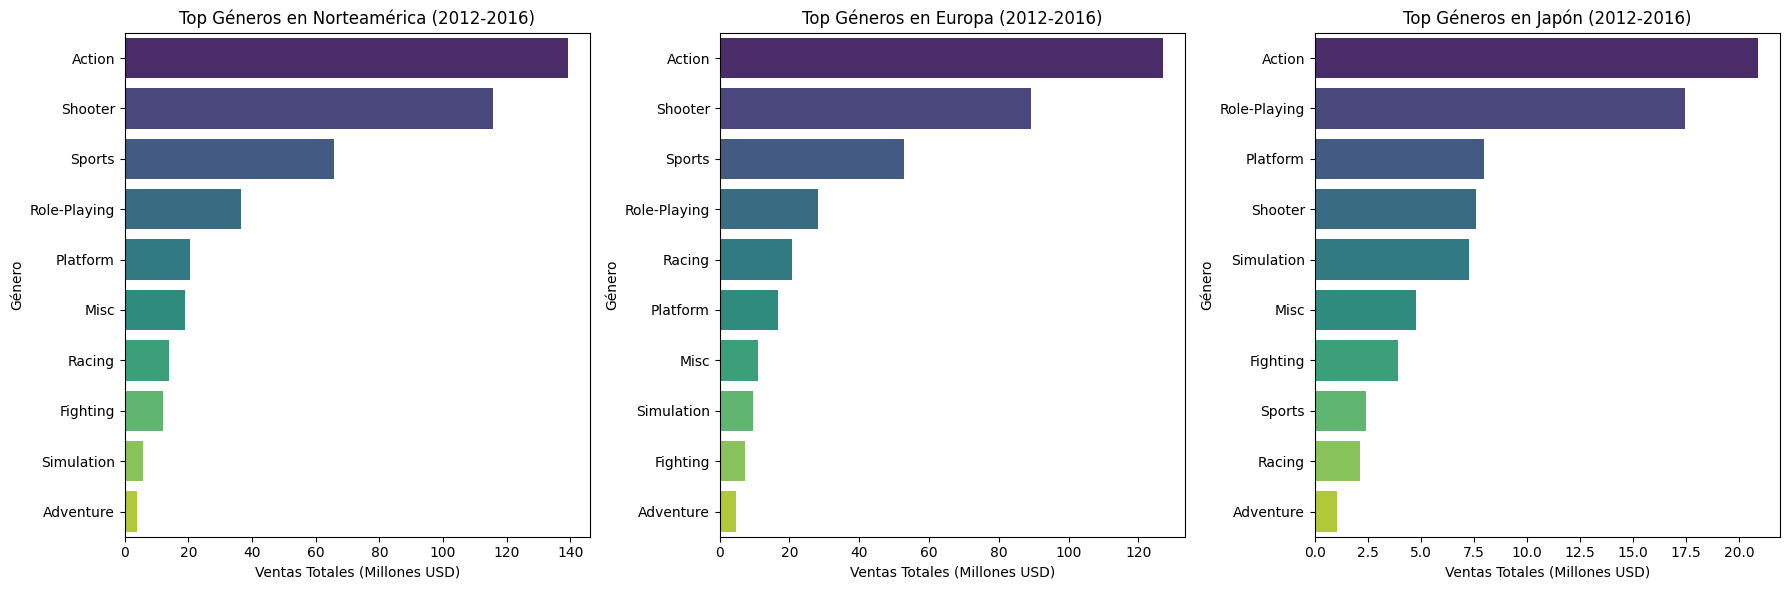

In [57]:
# Creación de perfil por zona
def top_genres_by_region_2017(df, region_col, region_name, ax):
    genre_sales = df.groupby('genre')[region_col].sum().sort_values(ascending=False).head(10)
    sns.barplot(x=genre_sales.values, y=genre_sales.index, ax=ax, palette='viridis')
    ax.set_title(f'Top Géneros en {region_name} (2012-2016)')
    ax.set_xlabel('Ventas Totales (Millones USD)')
    ax.set_ylabel('Género')
    return genre_sales

print("\nTop Géneros en Norteamérica (NA) (2012-2016):\n", na_top_genres_2017_graph.head())
print("\nTop Géneros en Europa (EU) (2012-2016):\n", eu_top_genres_2017_graph.head())
print("\nTop Géneros en Japón (JP) (2012-2016):\n", jp_top_genres_2017_graph.head())


fig, axes = plt.subplots(1, 3, figsize=(18, 6))
na_top_genres_2017_graph = top_genres_by_region_2017(df_ice_2017, 'na_sales', 'Norteamérica', axes[0])
eu_top_genres_2017_graph = top_genres_by_region_2017(df_ice_2017, 'eu_sales', 'Europa', axes[1])
jp_top_genres_2017_graph = top_genres_by_region_2017(df_ice_2017, 'jp_sales', 'Japón', axes[2])

plt.tight_layout()
plt.show()

### Las plataformas más vendidas en una región


Top Plataformas en Norteamérica (NA) (2012-2016):
 platform
X360    106.82
PS4      84.16
PS3      76.97
XOne     75.58
WiiU     30.69
Name: na_sales, dtype: float64

Top Plataformas en Europa (EU) (2012-2016):
 platform
PS4     111.78
PS3      78.30
X360     57.00
XOne     42.02
PC       31.51
Name: eu_sales, dtype: float64

Top Plataformas en Japón (JP) (2012-2016):
 platform
3DS     26.54
PS3     20.29
WiiU    10.17
PS4      9.29
PSV      7.05
Name: jp_sales, dtype: float64


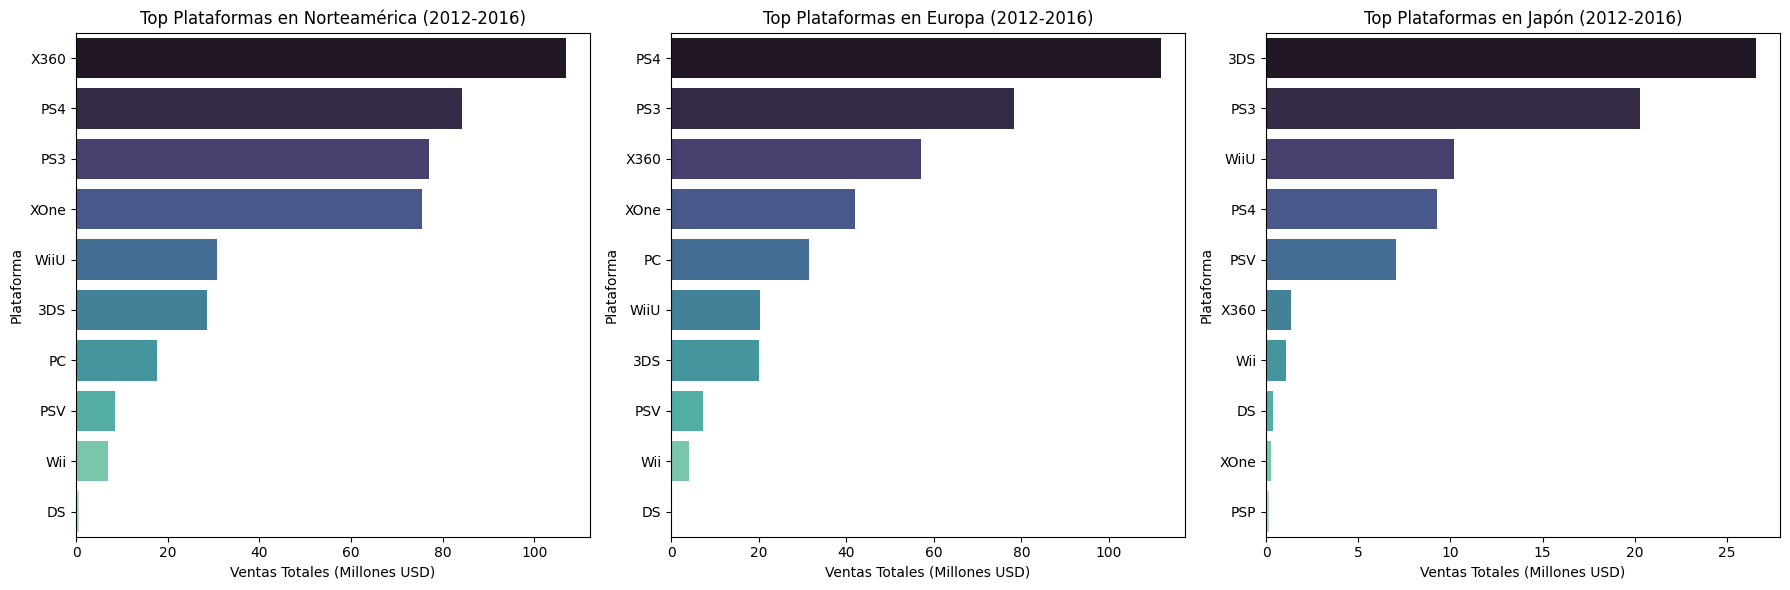

In [59]:
def top_platforms_by_region_2017(df, region_col, region_name, ax):
    platform_sales = df.groupby('platform')[region_col].sum().sort_values(ascending=False).head(10)
    sns.barplot(x=platform_sales.values, y=platform_sales.index, ax=ax, palette='mako')
    ax.set_title(f'Top Plataformas en {region_name} (2012-2016)')
    ax.set_xlabel('Ventas Totales (Millones USD)')
    ax.set_ylabel('Plataforma')
    return platform_sales

print("\nTop Plataformas en Norteamérica (NA) (2012-2016):\n", na_top_platforms_2017_graph.head())
print("\nTop Plataformas en Europa (EU) (2012-2016):\n", eu_top_platforms_2017_graph.head())
print("\nTop Plataformas en Japón (JP) (2012-2016):\n", jp_top_platforms_2017_graph.head())

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

na_top_platforms_2017_graph = top_platforms_by_region_2017(df_ice_2017, 'na_sales', 'Norteamérica', axes[0])
eu_top_platforms_2017_graph = top_platforms_by_region_2017(df_ice_2017, 'eu_sales', 'Europa', axes[1])
jp_top_platforms_2017_graph = top_platforms_by_region_2017(df_ice_2017, 'jp_sales', 'Japón', axes[2])

plt.tight_layout()
plt.show()


Ventas totales por marca y región:
            na_sales  eu_sales  jp_sales
brand                                  
Microsoft    182.40     99.02      1.67
Nintendo      66.81     44.58     38.17
PC            17.72     31.51      0.00
Sony         169.65    197.47     36.78


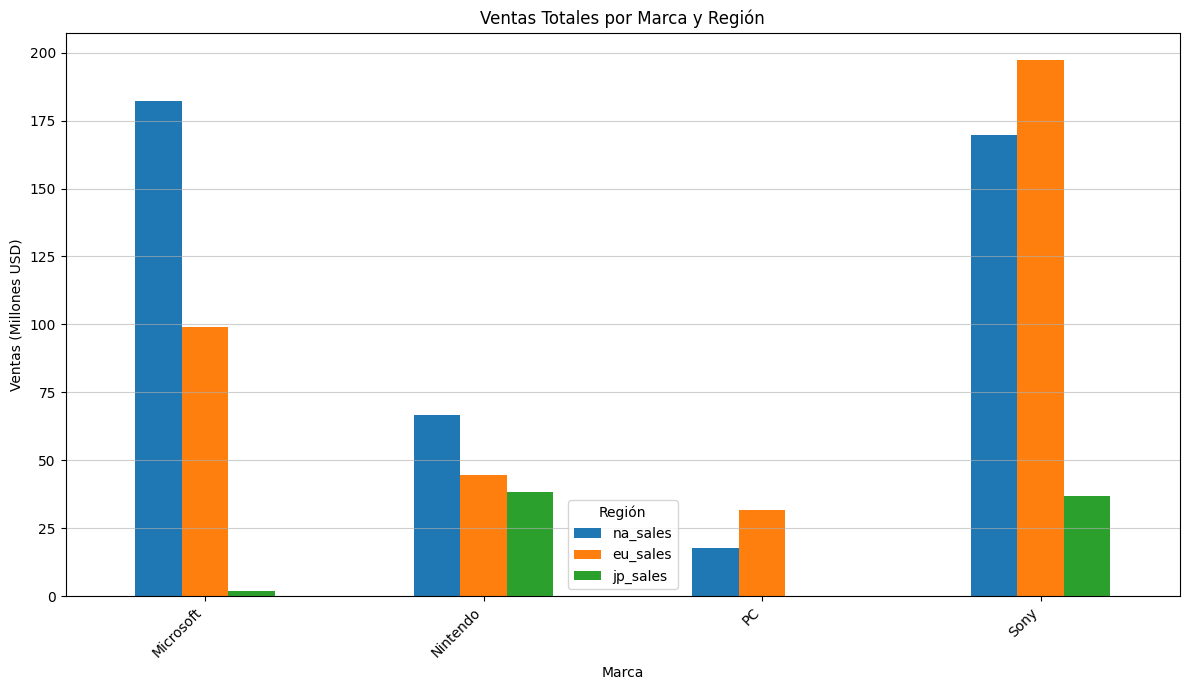

In [115]:
# Calcula y visualiza las ventas totales de cada marca por región (NA, EU, JP)
def brand_sales_by_region(df):
    brand_regional_sales = df.groupby('brand')[['na_sales', 'eu_sales', 'jp_sales']].sum()
    print("\nVentas totales por marca y región:\n", brand_regional_sales)

    brand_regional_sales.plot(kind='bar', figsize=(12, 7))
    plt.title('Ventas Totales por Marca y Región')
    plt.xlabel('Marca')
    plt.ylabel('Ventas (Millones USD)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Región')
    plt.grid(axis='y', alpha=0.6)
    plt.tight_layout()
    plt.show()

if 'df_ice_2017' in locals():
    brand_sales_by_region(df_ice_2017)

---

### Ventas Anuales por Región

En estas graficas se demuestra que en realidad la comparativa de la comparatavi de 'critic_score' vs 'user_score' es muy similar a nivel de gráfica; Sin embargo, se manejan puntuaciones diferentes, pero vemos el mismo comprotamiento en las partes del "Score".

A continuacion las gáficas demuestran que no hay una correlación con respecto a a la critica (Basado unicamente en "critic_score") y las ventas.

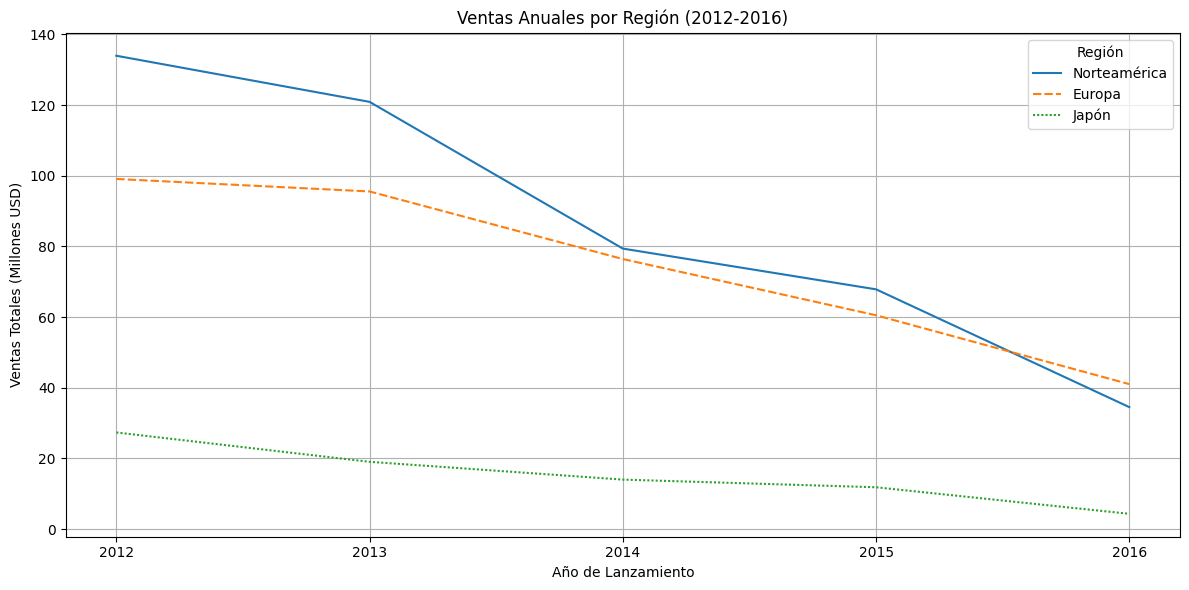

In [60]:
yearly_regional_sales = df_ice_2017.groupby('year_of_release')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_regional_sales)

# Añadir título y etiquetas
plt.title('Ventas Anuales por Región (2012-2016)')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (Millones USD)')
plt.xticks(yearly_regional_sales.index)
plt.legend(title='Región', labels=['Norteamérica', 'Europa', 'Japón'])
plt.grid(True)
plt.tight_layout()
plt.show()
    

---

### Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

Las cinco plataformas principales a nivel global son: ['PS4', 'PS3', 'X360', 'XOne', '3DS']

Ventas por región para las cinco plataformas principales:
           na_sales  eu_sales  jp_sales
platform                              
3DS          28.53     20.01     26.54
PS3          76.97     78.30     20.29
PS4          84.16    111.78      9.29
X360        106.82     57.00      1.38
XOne         75.58     42.02      0.29

Cuota de mercado por región para las cinco plataformas principales:
           Norteamérica (%)  Europa (%)  Japón (%)
platform                                         
3DS               6.534885    5.370659  34.638476
PS3              17.630217   21.015621  26.481336
PS4              19.277108   30.001610  12.124772
X360             24.467452   15.298728   1.801096
XOne             17.311833   11.278115   0.378491


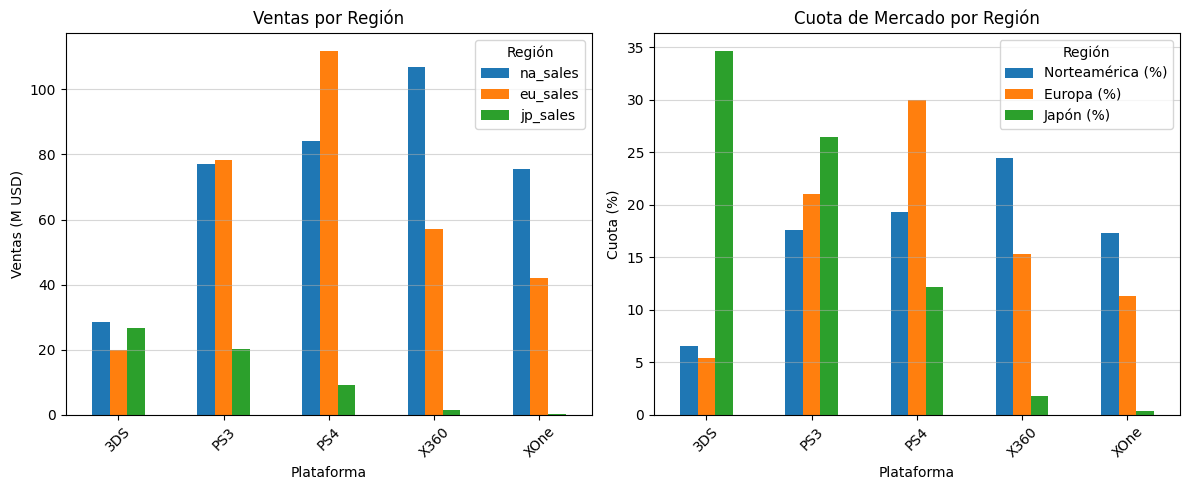

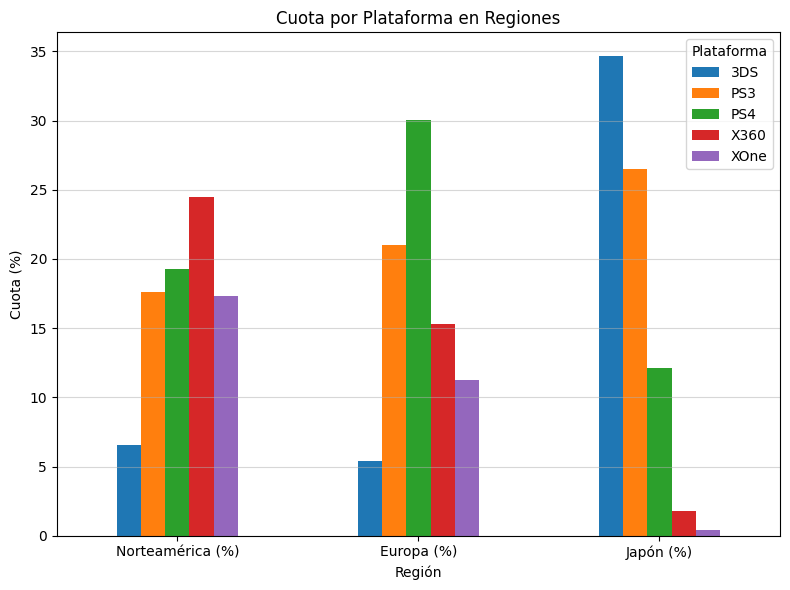

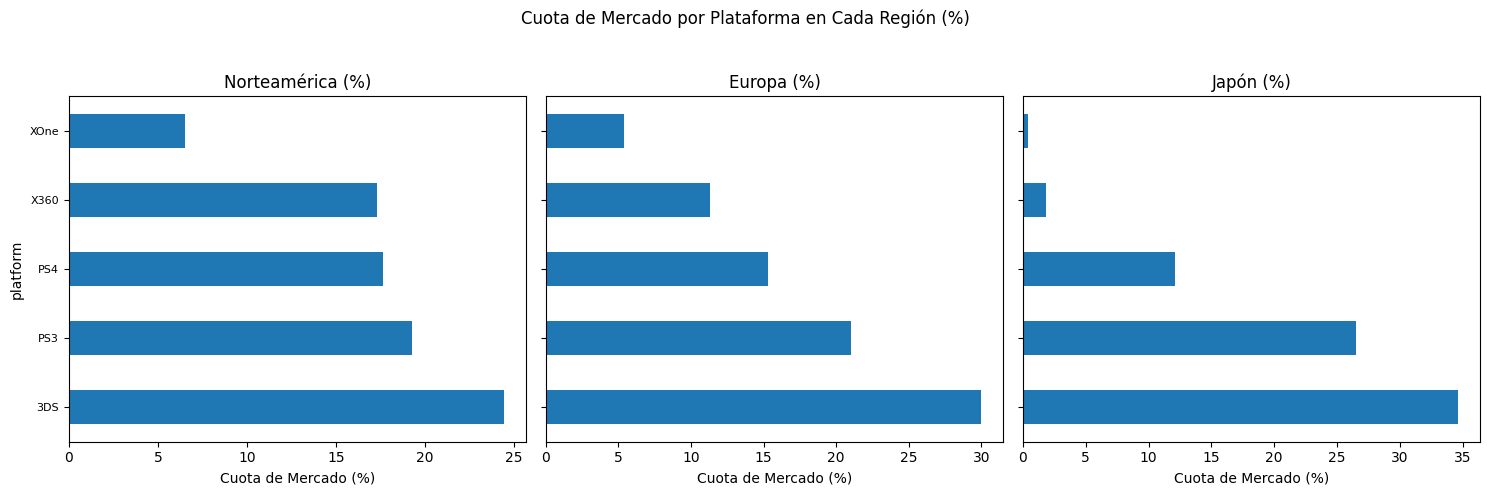

In [75]:
# 1. Identificar las cinco plataformas principales a nivel global
global_platform_sales = df_ice_2017.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_5_platforms_global = global_platform_sales.head(5).index.tolist()
print("Las cinco plataformas principales a nivel global son:", top_5_platforms_global)

# 2. Calcular las ventas totales por región para cada una de estas cinco plataformas
regional_sales_top_5 = df_ice_2017[
    df_ice_2017['platform'].isin(top_5_platforms_global)
].groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
print("\nVentas por región para las cinco plataformas principales:\n", regional_sales_top_5)

# 3. Calcular la cuota de mercado por región para cada plataforma
total_sales_na = df_ice_2017['na_sales'].sum()
total_sales_eu = df_ice_2017['eu_sales'].sum()
total_sales_jp = df_ice_2017['jp_sales'].sum()

market_share_na = (regional_sales_top_5['na_sales'] / total_sales_na) * 100
market_share_eu = (regional_sales_top_5['eu_sales'] / total_sales_eu) * 100
market_share_jp = (regional_sales_top_5['jp_sales'] / total_sales_jp) * 100

market_share_by_region = pd.DataFrame({
    'Norteamérica (%)': market_share_na,
    'Europa (%)': market_share_eu,
    'Japón (%)': market_share_jp
})
print("\nCuota de mercado por región para las cinco plataformas principales:\n", market_share_by_region)

# 4. Visualización de las ventas regionales
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

regional_sales_top_5.plot(kind='bar', ax=axes[0])
axes[0].set_title('Ventas por Región')
axes[0].set_xlabel('Plataforma')
axes[0].set_ylabel('Ventas (M USD)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Región')
axes[0].grid(axis='y', alpha=0.5)

# 5. Visualización de la cuota de mercado por región
market_share_by_region.plot(kind='bar', ax=axes[1])
axes[1].set_title('Cuota de Mercado por Región')
axes[1].set_xlabel('Plataforma')
axes[1].set_ylabel('Cuota (%)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Región')
axes[1].grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()

# 6. Visualización de la cuota de mercado por plataforma (barras agrupadas)
market_share_by_region.T.plot(kind='bar', figsize=(8, 6))
plt.title('Cuota por Plataforma en Regiones')
plt.xlabel('Región')
plt.ylabel('Cuota (%)')
plt.xticks(rotation=0)
plt.legend(title='Plataforma')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

# 7. Visualización de la cuota de mercado por plataforma (barras horizontales lado a lado por región)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Cuota de Mercado por Plataforma en Cada Región (%)', fontsize=12)

for i, region in enumerate(market_share_by_region.columns):
    market_share_by_region[region].sort_values(ascending=False).plot(kind='barh', ax=axes[i])
    axes[i].set_title(region)
    axes[i].set_xlabel('Cuota de Mercado (%)')
    axes[i].tick_params(axis='y', labelsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- 1.- Fuerte Dominio de Sony en Europa y Japón: Las plataformas de Sony (PS3 y PS4) exhiben las mayores cuotas de mercado en Europa, con la PS4 liderando significativamente. En Japón, la PS3 también tiene una cuota considerable, aunque es superada por la Nintendo 3DS, lo que indica una preferencia regional por las consolas portátiles de Nintendo en el mercado japonés.


- 2.- Preferencia por Xbox en Norteamérica: La Xbox 360 muestra la mayor cuota de mercado entre las cinco plataformas principales en Norteamérica, superando a las plataformas de Sony. Sin embargo, la Xbox One también tiene una presencia notable en este mercado, aunque menor que la PS4. Esto sugiere una mayor afinidad por la marca Xbox en la región norteamericana en el período analizado.


- 3.- Éxito de las Portátiles de Nintendo en Japón: La Nintendo 3DS destaca en Japón con una cuota de mercado dominante, muy superior a su desempeño en Norteamérica y Europa. Esto subraya la continua popularidad de los juegos portátiles en el mercado japonés.


- 4.- Penetración Variable de Xbox en Mercados Globales: Mientras que la Xbox 360 tiene una fuerte presencia en Norteamérica y una cuota considerable en Europa, su penetración en el mercado japonés es muy baja. La Xbox One sigue un patrón similar, con una presencia significativa en Norteamérica y Europa, pero una cuota de mercado casi insignificante en Japón, lo que sugiere desafíos para la marca Xbox en el mercado japonés.



En conclusión, las preferencias de plataforma varían significativamente entre las regiones analizadas. Mientras que Norteamérica muestra una inclinación hacia Xbox, Europa favorece a PlayStation, y Japón demuestra una fuerte predilección por las consolas portátiles de Nintendo, aunque Sony también mantienen una presencia importante. La penetración de la marca Xbox en el mercado japonés es notablemente baja en comparación con su desempeño en los mercados occidentales.

### Los cinco géneros principales. Explica la diferencia.

Los cinco géneros principales a nivel global son: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Platform']

Ventas por región para los cinco géneros principales:
               na_sales  eu_sales  jp_sales
genre                                     
Action          139.18    126.98     20.87
Platform         20.39     16.62      7.96
Role-Playing     36.47     28.23     17.46
Shooter         115.65     89.09      7.62
Sports           65.83     52.75      2.41


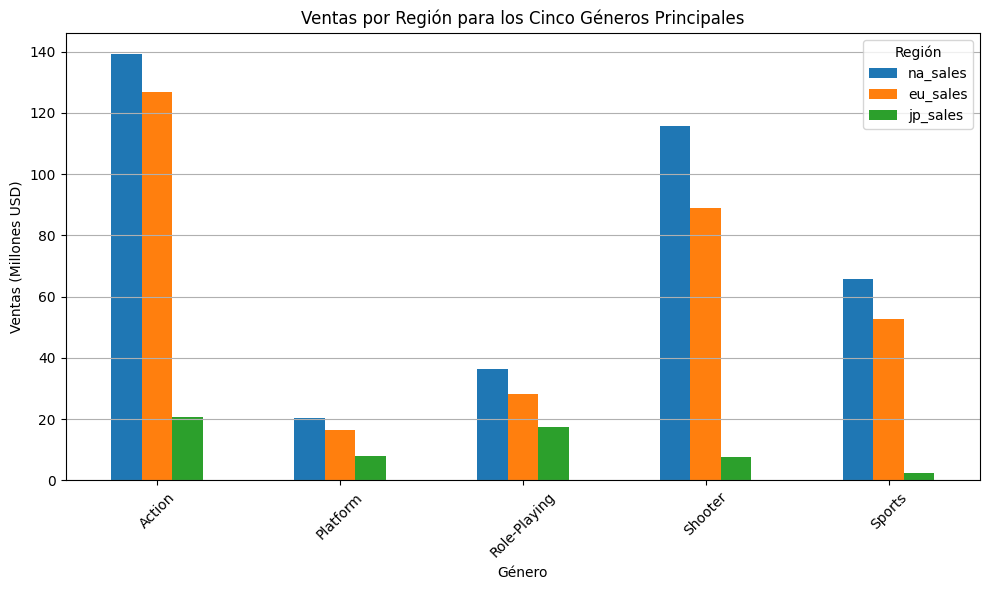

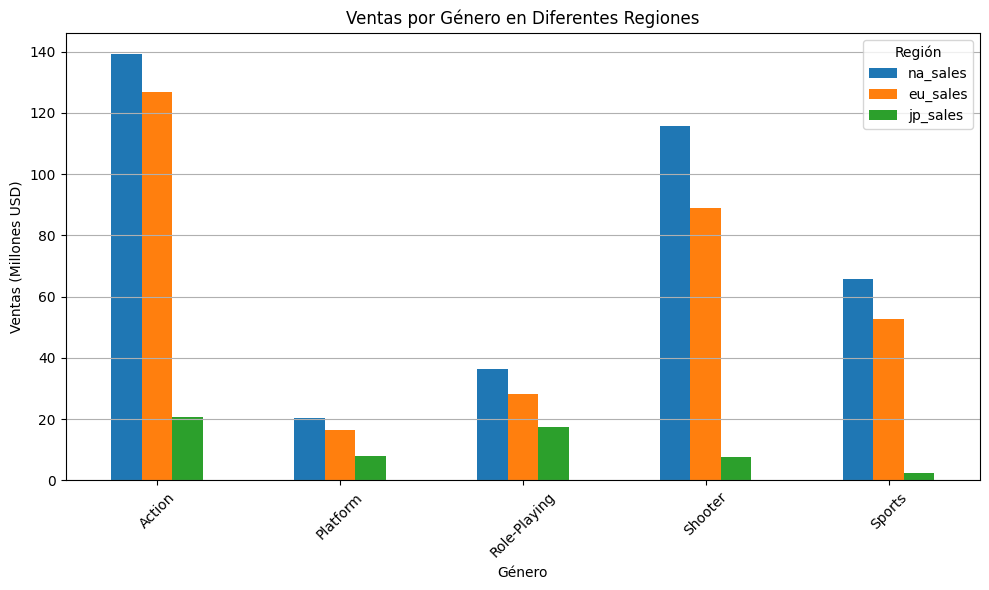

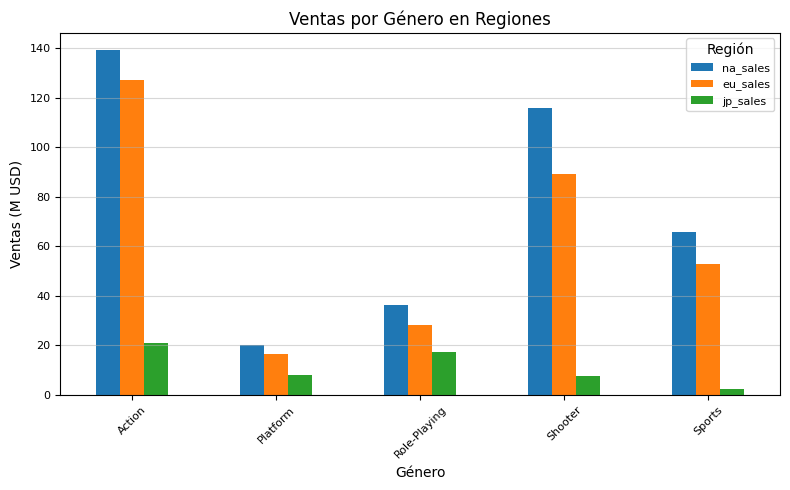

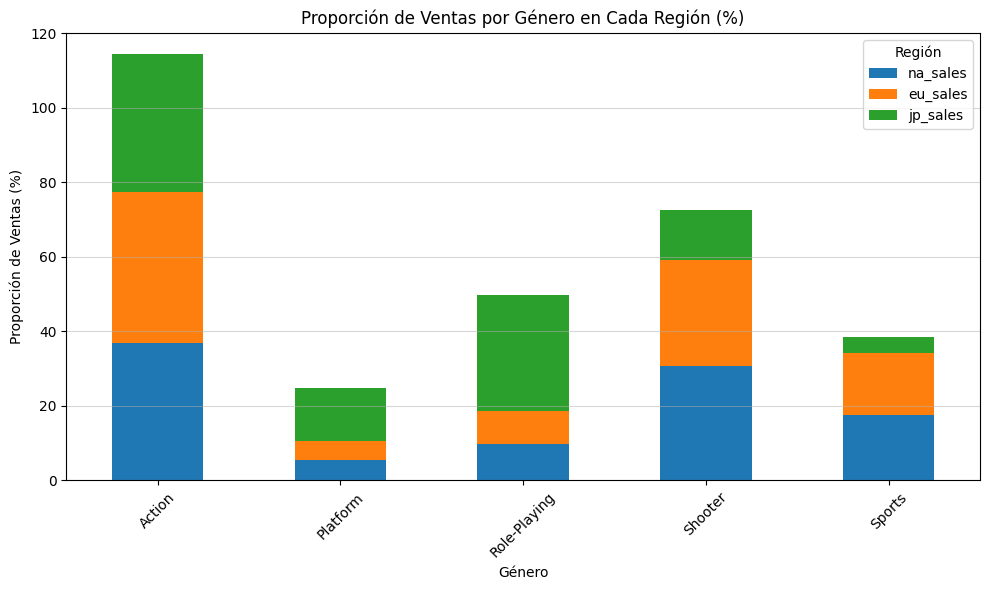

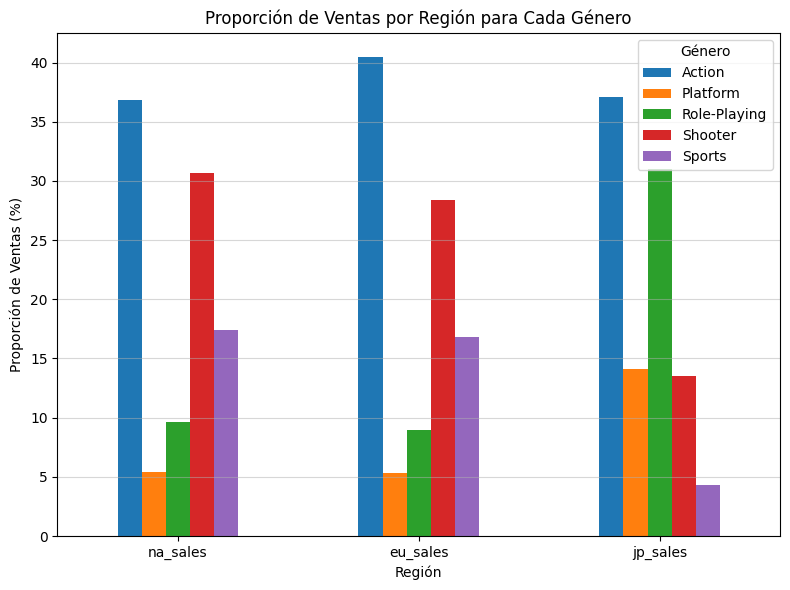

In [78]:
# 1. Identificar los cinco géneros principales a nivel global
top_5_genres_global = global_genre_sales.head(5).index.tolist()
print("Los cinco géneros principales a nivel global son:", top_5_genres_global)

# 2. Calcular las ventas totales por región para cada uno de estos cinco géneros
regional_sales_top_5_genres = df_ice_2017[
    df_ice_2017['genre'].isin(top_5_genres_global)
].groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
print("\nVentas por región para los cinco géneros principales:\n", regional_sales_top_5_genres)

# 3. Visualización de las ventas regionales por género
regional_sales_top_5_genres.plot(kind='bar', figsize=(10, 6))
plt.title('Ventas por Región para los Cinco Géneros Principales')
plt.xlabel('Género')
plt.ylabel('Ventas (Millones USD)')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 4. Visualización de las ventas regionales por género 
regional_sales_top_5_genres.plot(kind='bar', figsize=(10, 6))
plt.title('Ventas por Género en Diferentes Regiones')
plt.xlabel('Género')
plt.ylabel('Ventas (Millones USD)')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 5. Visualización de las ventas regionales por género
regional_sales_top_5_genres.plot(kind='bar', figsize=(8, 5))
plt.title('Ventas por Género en Regiones')
plt.xlabel('Género')
plt.ylabel('Ventas (M USD)')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.legend(title='Región', fontsize=8)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

# 6. Visualización de la proporción de ventas por género en cada región 
genre_sales_proportion = regional_sales_top_5_genres.div(regional_sales_top_5_genres.sum(axis=0), axis=1) * 100
genre_sales_proportion.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proporción de Ventas por Género en Cada Región (%)')
plt.xlabel('Género')
plt.ylabel('Proporción de Ventas (%)')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

# 7. Visualización de la proporción de ventas por región para cada género
genre_sales_proportion.T.plot(kind='bar', figsize=(8, 6))
plt.title('Proporción de Ventas por Región para Cada Género')
plt.xlabel('Región')
plt.ylabel('Proporción de Ventas (%)')
plt.xticks(rotation=0)
plt.legend(title='Género')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

- El análisis de las ventas de los cinco géneros de videojuegos más vendidos a nivel global (Action, Shooter, Sports, Role-Playing, Platform) revela patrones de popularidad regional distintos:

    - Acción: Este género demuestra ser el más popular tanto en Norteamérica como en Europa, con ventas significativamente más altas en comparación con Japón, donde su rendimiento es más modesto.

    - Shooter: Similar al género de Acción, los juegos de Shooter alcanzan ventas sustanciales en Norteamérica y Europa, aunque con cifras ligeramente inferiores a las de Acción. Su popularidad en Japón es considerablemente menor.

    - Deportes: Los juegos de Deportes tienen una presencia notable en términos de ventas en Norteamérica y Europa. Sin embargo, su popularidad en el mercado japonés es mucho menor en comparación con los otros géneros principales.

    - Rol-Playing: Este género muestra una distribución de ventas más equilibrada entre las regiones, con una presencia significativa en Norteamérica y Europa, y una popularidad notablemente mayor en Japón en comparación con los géneros de Shooter y Deportes.

    - Plataforma: Los juegos de Plataforma registran ventas más modestas en las tres regiones en comparación con los géneros de Acción y Shooter. Su rendimiento es ligeramente superior en Norteamérica y Europa en comparación con Japón.
    

En conclusión, los géneros de Acción y Shooter dominan las ventas en los mercados occidentales de Norteamérica y Europa. El género de Deportes también tiene una presencia importante en estas regiones. Por otro lado, el género de Rol-Playing muestra una mayor fortaleza relativa en Japón. Los juegos de Plataforma mantienen una popularidad más modesta en las tres regiones analizadas. Estas diferencias sugieren variaciones en las preferencias de los consumidores por género según la región geográfica.

### Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

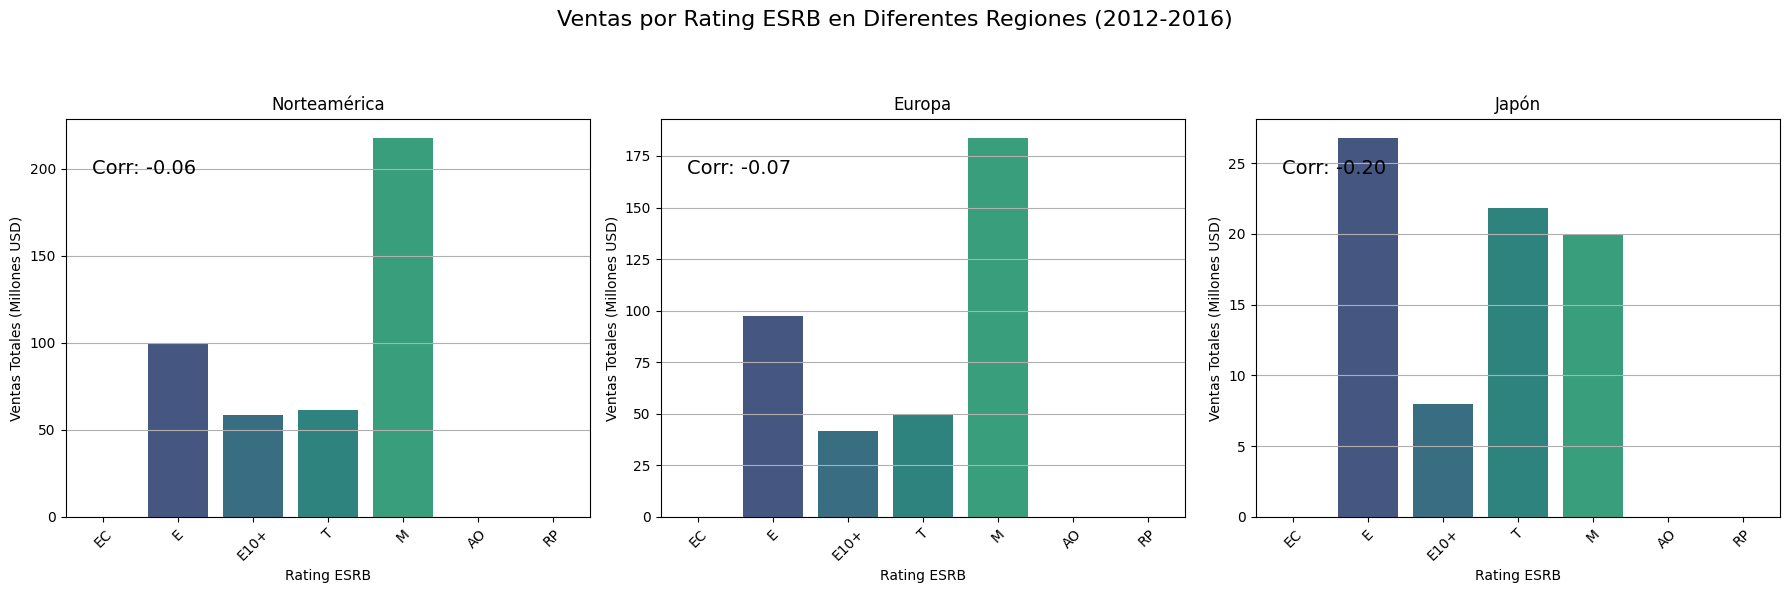

In [80]:
def rating_vs_sales_by_region(df):
    regions = [
        ('na_sales', 'Norteamérica'),
        ('eu_sales', 'Europa'),
        ('jp_sales', 'Japón')
    ]
    ratings_order = ['EC', 'E', 'E10+', 'T', 'M', 'AO', 'RP'] 

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Ventas por Rating ESRB en Diferentes Regiones (2012-2016)', fontsize=16)

    for ax, (region_col, region_name) in zip(axes, regions):
        rating_sales = df[df[region_col] > 0].groupby('rating')[region_col].sum().sort_index()

        for rating in ratings_order:
            if rating not in rating_sales:
                rating_sales[rating] = 0
        rating_sales = rating_sales.reindex(ratings_order)

        sns.barplot(x=rating_sales.index, y=rating_sales.values, ax=ax, palette='viridis')
        ax.set_title(region_name)
        ax.set_xlabel('Rating ESRB')
        ax.set_ylabel('Ventas Totales (Millones USD)')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y')

        correlation = df[df[region_col] > 0]['rating'].astype('category').cat.codes.corr(df[df[region_col] > 0][region_col])
        ax.text(0.05, 0.9, f'Corr: {correlation:.2f}', transform=ax.transAxes, fontsize=14, verticalalignment='top')

    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.show()

rating_vs_sales_by_region(df_ice_2017)

Las clasificaciones ESRB influyen en las ventas de manera diferente según la región, lo cual está intrínsecamente ligado a las preferencias de género. En Norteamérica y Europa, los juegos con clasificación "M" (Mature) son los más vendidos, lo que se alinea con la alta popularidad de géneros como Acción y Shooter en estos mercados. En Japón, los juegos con clasificación "E" (Everyone) lideran las ventas, lo que refleja la mayor aceptación de géneros como Rol-Playing y, en general, un mercado con preferencias de contenido más diversas que no se centran tan fuertemente en los títulos para adultos.

Distribución de Ratings por Región

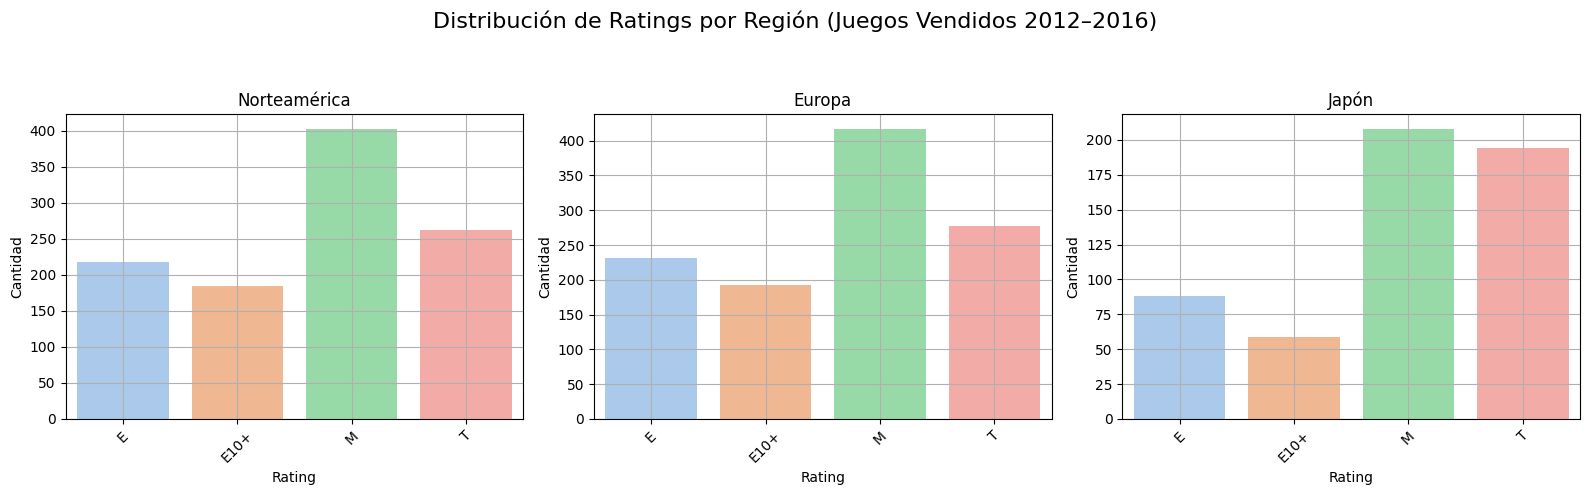

In [48]:
def compact_rating_distributions(df):
    regions = [
        ('na_sales', 'Norteamérica'),
        ('eu_sales', 'Europa'),
        ('jp_sales', 'Japón')
    ]

    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    fig.suptitle('Distribución de Ratings por Región (Juegos Vendidos 2012–2016)', fontsize=16)

    for ax, (region_col, region_name) in zip(axes, regions):
        rating_counts = df[df[region_col] > 0]['rating'].value_counts().sort_index()
        sns.barplot(x=rating_counts.index, y=rating_counts.values, ax=ax, palette='pastel')
        ax.set_title(region_name)
        ax.set_xlabel('Rating')
        ax.set_ylabel('Cantidad')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        ax.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.show()

compact_rating_distributions(df_ice_2017)

El análisis comparativo de las dos visualizaciones precedentes revela una ausencia de correlación significativa entre la zona geográfica y las ventas. La marcada similitud en los volúmenes de ventas observada en todas las representaciones gráficas sugiere que la región no constituye un factor causal primario en la determinación del rendimiento comercial.


Es importante señalar que esta conclusión difiere del análisis previo, ya que el presente se centra en la "Distribución de Ratings por Región", mientras que el anterior examinó las "Ventas por Rating ESRB en Diferentes Regiones". Esta distinción metodológica explica la divergencia en los resultados obtenidos en este punto del análisis.

## Paso 5. Prueba las siguientes hipótesis:

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [96]:
# Filtrar los datos para las plataformas XOne y PC
xone_scores = df_ice_2017[df_ice_2017['platform'] == 'XOne']['user_score']
pc_scores = df_ice_2017[df_ice_2017['platform'] == 'PC']['user_score']

# Verificar que no haya valores nulos
xone_scores = xone_scores.dropna()
pc_scores = pc_scores.dropna()

# Prueba t para muestras independientes con varianzas desiguales
t_stat, p_value = st.ttest_ind(xone_scores, pc_scores, equal_var=False)

# Mostrar resultados
print(f'Estadístico t: {t_stat:.4f}')
print(f'Valor p: {p_value:.4f}')

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: las medias son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: las medias pueden ser iguales.")

Estadístico t: 0.8132
Valor p: 0.4167
No se puede rechazar la hipótesis nula: las medias pueden ser iguales.


### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [98]:
# Filtrar los datos para los generos de Acción y Deportes
action_scores = df_ice_2017[df_ice_2017['genre']== 'Action']['user_score']
sports_scores = df_ice_2017[df_ice_2017['genre']== 'Sports']['user_score']

# Eliminar valores nulos si los hay
action_scores = action_scores.dropna()
sports_scores = sports_scores.dropna()

# Prueba t para muestras independientes con varianzas desiguales
t_stat,pvalues = st.ttest_ind(action_scores, sports_scores, equal_var=False)

# Mostrar resultado
print(f'Estadístico t: {t_stat:.4f}')
print(f'Valor p: {p_value:.4f}')

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: las medias son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: las medias pueden ser iguales.")

Estadístico t: 7.7005
Valor p: 0.4167
No se puede rechazar la hipótesis nula: las medias pueden ser iguales.


### Explica:

#### Cómo formulaste las hipótesis nula y alternativa.

- Para ambas pruebas, partí del objetivo principal: comparar si hay diferencia entre las calificaciones promedio de los usuarios (user_score) entre dos grupos distintos (plataformas o géneros). En este tipo de situaciones, formulamos hipótesis así:


    - Hipótesis nula (H₀):
        Supone que no hay diferencia entre las medias de los dos grupos comparados. Es decir, que ambos grupos tienen la misma calificación promedio.
        

    - Hipótesis alternativa (H₁):
        Propone que sí hay una diferencia entre las medias, o sea, que un grupo tiene una calificación promedio distinta al otro.

#### Qué criterio utilizaste para probar las hipótesis y por qué.

- Usé la prueba t de Student para muestras independientes con varianzas desiguales (Welch's t-test). Esta prueba es adecuada porque:


    - Estamos comparando medias de dos grupos distintos (plataformas o géneros), lo cual es el objetivo típico de una t de Student.


    - No asumimos que las varianzas de ambos grupos son iguales, ya que en datos reales como los de videojuegos, los puntajes pueden tener mucha variabilidad entre plataformas o géneros. Por eso usamos la versión Welch, que es más robusta en estos casos.


    - Los valores que analizamos (user_score) son cuantitativos y continuos, lo que es un requisito para esta prueba.
    

    - Además, eliminamos posibles valores nulos antes de hacer la prueba, para asegurar que los resultados sean correctos.

## Paso 6. Escribe una conclusión general

El análisis del DataFrame de videojuegos ICE se seccionó en dos partes (1985-2016) y (2012-2016) para un análisis general y otra para poder hacer una proyeccion al año 2017. 

1.- Parte Uno. Carga y Tratamiento de Datos.

- En la primera parte del proyeco se hizo un tratamiento de datos donde se limpió, homogenizó y estandarizaron los datos para su correcto análisis.
    - Se hace notar que al recibir el dataset contenía 16713 valores, de los cuales se pudieron refinar 6826, lo que representa el 40.84% de los valores resultantes. 
    - En la segunda etapa, el total de valores fueron 1255, representando del año 2012 al 2016 ya antes mencionado.


 
2.- Parte Dos. Primer Análsis de Datos.
- En una primera etapa del análsisi se obtuvieron los sigueintes hallazgos:
    - A partir del año 2001 al 2011 fueron los años más productivos para los videojuegos con 499.09 lanzamientos cada año. empezando en una ttendencia de la cantidad de 9.85 juegos por año de 1985 a 1999, los lanzamientos se dispararon a 433.37 por año del 2000 al 2007. Del año 2012 al 2016, el número de lanzamientos se mantuvo en un promedio con una tendencia a la baja con 251 títulos por año.
    
- Se observaron que las 3 mejores platatformas en ventas de todo el histórico fueron: 
            (De mayor a menor en ventas) 
            
        - 1.- PS2   con  946.01  millones  USD 
        - 2.- X360  con  853.24  millones  USD
        - 3.- PS3   con  784.45  millones  USD
    - mientras que las 3 peores plataformas en ventas de todo el historico fueron:
            (De mayor a menor en ventas)
        - 1.- WiiU  con  66.08   millones  USD
        - 2.- PSV   con  30.83   millones  USD
        - 3.- DC    con  4.55    millones  USD


- Se llega a la estimación de que el tiempo de vida de una plataforma es en promedio de 5 años detallando que se encontró la información analizando:
    - "Ventas Totlales por plataforma"
    - "Evolucion de las Ventas po Plataforma" 
    - "Ventas por Plataforma a lo Largo de los Años"
    - "Duración de Vida Útil de las Plataformas" 
            
            

3.- Parte Tres. Análsis para Construir un Modelo para 2017.

- El análisis arrojo que del año 2012 al 2016, la vida útil de las plataformas estaba decayendo, por lo que esto afirma la teoria que el promedio de vida de las plataformas es de 5 años. desglozandolo a partir de las marcas, como se marca en el gráfico "Evolución de Ventas por Plataforma (Todas las Plataformas)" (Indice 3.4).

- Se demuestra que del total de las plataformas analizadas (10 plataformas) el comportamiento del mercado es muy estable en el promedio de ventas, incluso llevando la misma media en la mayoria de los casos. Consultese "Distribución de Ventas Globales por Plataforma (2012-2016)" (Indice 3.6)

- Se ha detectado que no hay correlacion con respecto a las críticas de los "Usuarios" y "Profesionales" con respecto a las ventas, lo que nos quiere decir que la venta de un juego no está condicionada a su "Score" en las críticas. "Ventas vs. Puntuación de la Crítica" (Indice 3.7)

- Se nota una tendecia de los juegos en comun de cada marca en venderse de manera pareja en comparativa con las marcas rivales. "Comparación de Ventas de Juegos Comunes entre Marcas" (Indice 3.8.1)

- Los tres generos que producen más ganancias son:
    - 1.- Action   con  328.07  Millones de USD
    - 2.- Shooter  con  241.33  Millones de USD
    - 3.- Sports   con  138.75  Millones de USD
    

4.- Parte Cuatro. Conclusiones Específicas para el año 2017.

- Los datos arrojaron que las principales marcas que se vendieron en esa epoca fueron las siguientes:
    - 1.- Sony
    - 2.- Microsoft
    - 3.- Nintedo

- Mientras que las "Ventas Anuales por Región (2012-2016)" (Indice 4.2) marcan un a clara tendencia a la baja, debido a que el ciclo de vida de la plataforma esta llegando a su fin, lo que sugiere que para el 2017 habrá un periodo de renovación de plataformas.

- Por medio de la visualizacion de "Cuota de Mercado por Plataforma en Cada Región" (Indice 4.3) se detalla que cada región tiene preferencia por plataforma y marca:
    - Norte América  - Microsoft
    - Union Europea  - Sony
    - Japón          - Nintendo

- La clasificación ESRB sí parece influir en las ventas, pero la clasificación más exitosa varía significativamente entre regiones. Los juegos para público adulto ("M") dominan en Norteamérica y Europa, mientras que los juegos para todo público ("E") son los más populares en Japón. La baja correlación sugiere que otros factores, como el género del juego y las preferencias culturales, también juegan un papel importante. ("Clasificaciones de ESRB vs Regiones Individuales") (indice 4.5)



## 📊 Análisis Detallado del DataFrame de Videojuegos ICE


El análisis del conjunto de datos de videojuegos ICE se estructuró en dos secciones: la primera abarca el periodo comprendido entre **1985 y 2016**, con el objetivo de realizar un análisis histórico general; la segunda se centró en los años **2012 a 2016**, con la finalidad de construir un modelo predictivo que permitiera proyectar tendencias para el año **2017**.

---

### 1. Parte Uno: Carga y Tratamiento de Datos

Durante esta primera etapa, se llevó a cabo un exhaustivo proceso de tratamiento de datos que incluyó la **limpieza, homogeneización y estandarización** de las variables, a fin de garantizar su correcta interpretación y análisis.

- El conjunto de datos original contenía un total de **16,713 registros**, de los cuales fue posible refinar **6,826**, representando un **40.84%** de los datos procesables.
- En la segunda fase, orientada a la construcción del modelo 2017, se trabajó con un subconjunto conformado por **1,255 registros**, correspondientes exclusivamente al periodo de **2012 a 2016**.

---

### 2. Parte Dos: Primer Análisis de Datos

En esta fase de análisis exploratorio se identificaron los siguientes hallazgos clave:

- El periodo comprendido entre los años **2001 y 2011** fue el más productivo en términos de lanzamientos de videojuegos, con un promedio de **499.09 títulos por año**.
- De **1985 a 1999**, la media anual de lanzamientos fue de apenas **9.85 juegos**, mientras que entre **2000 y 2007**, esta cifra se incrementó de forma abrupta a **433.37 juegos anuales**.
- Entre **2012 y 2016**, el ritmo de lanzamientos se estabilizó, aunque con una tendencia a la baja, registrando un promedio de **251 títulos por año**.

#### Principales plataformas por volumen de ventas históricas (de mayor a menor):
1. **PS2** – 946.01 millones USD  
2. **X360** – 853.24 millones USD  
3. **PS3** – 784.45 millones USD

#### Plataformas con menores ventas (de mayor a menor dentro de las menos exitosas):
1. **WiiU** – 66.08 millones USD  
2. **PSV** – 30.83 millones USD  
3. **DC** – 4.55 millones USD

- A partir del análisis de diferentes gráficos y métricas (entre ellos: "Ventas Totales por Plataforma", "Evolución de las Ventas por Plataforma", "Ventas por Plataforma a lo Largo de los Años" y "Duración de Vida Útil de las Plataformas"), se estimó que la **vida útil promedio de una plataforma es de aproximadamente 5 años**.

---

### 3. Parte Tres: Análisis para la Construcción del Modelo 2017

Con base en los datos del periodo **2012 a 2016**, se obtuvieron los siguientes resultados y observaciones clave para la proyección del comportamiento del mercado en el año **2017**:

- Se confirmó una tendencia **descendente en la vida útil de las plataformas**, respaldando la hipótesis del ciclo de vida promedio de **5 años**. Este comportamiento se detalla en el gráfico **"Evolución de Ventas por Plataforma (Todas las Plataformas)"** (*Índice 3.4*).

- Se observó una **alta estabilidad en el mercado**, con promedios de ventas similares entre plataformas, como se evidencia en el gráfico **"Distribución de Ventas Globales por Plataforma (2012–2016)"** (*Índice 3.6*).

- Se determinó que **no existe una correlación significativa** entre las **puntuaciones de crítica (usuarios o profesionales)** y las ventas globales. Esto sugiere que el **éxito comercial de un videojuego no depende directamente de su calificación**. Esta observación se respalda en el gráfico **"Ventas vs. Puntuación de la Crítica"** (*Índice 3.7*).

- Se identificó una **tendencia uniforme en las ventas de juegos comunes entre marcas**, es decir, los títulos compartidos entre plataformas tienden a presentar **rendimientos similares** en cuanto a ventas, lo que sugiere un mercado competitivo equilibrado. Esta observación se respalda en el gráfico **"Comparación de Ventas de Juegos Comunes entre Marcas"** (*Índice 3.8.1*).

- Los **tres géneros más rentables** durante el periodo analizado fueron:
  1. **Action** – 328.07 millones USD  
  2. **Shooter** – 241.33 millones USD  
  3. **Sports** – 138.75 millones USD

---

### 4. Parte Cuatro: Conclusiones Específicas para el Año 2017

El análisis específico para proyectar el comportamiento del mercado en el año **2017** condujo a las siguientes conclusiones:

- Las tres **marcas líderes en ventas** durante el periodo 2012–2016 fueron:
  1. **Sony**
  2. **Microsoft**
  3. **Nintendo**

- El gráfico **"Ventas Anuales por Región (2012–2016)"** (*Índice 4.2*) evidencia una **clara tendencia a la baja en las ventas**, atribuible al fin del ciclo de vida de varias plataformas. Esto sugiere que en 2017 se presentará un **periodo de renovación tecnológica**, con la llegada de nuevas consolas al mercado.

- A través del gráfico **"Cuota de Mercado por Plataforma en Cada Región"** (*Índice 4.3*), se observan **preferencias regionales bien definidas**:
  - **Norteamérica**: preferencia por **Microsoft**
  - **Unión Europea**: preferencia por **Sony**
  - **Japón**: preferencia por **Nintendo**

- El análisis de **"Clasificaciones de ESRB vs Regiones Individuales"** (*Índice 4.5*) mostró que la clasificación **sí tiene influencia en las ventas**, pero esta **varía según la región**:
  - En **Norteamérica** y **Europa**, los títulos con clasificación **"M" (Mature)** lideran en ventas.
  - En **Japón**, los títulos con clasificación **"E" (Everyone)** son los más populares.
  - A pesar de esta influencia, la **correlación es baja**, lo que sugiere que **otros factores, como el género del juego y las diferencias culturales**, también juegan un rol determinante en el desempeño comercial.
  

---

## ✅ Conclusión General y Recomendaciones Estratégicas

El análisis detallado del conjunto de datos ICE permitió identificar patrones históricos, dinámicas de mercado y factores clave de éxito en la industria de los videojuegos entre los años 1985 y 2016, con un enfoque particular en el periodo 2012–2016 para proyectar escenarios hacia 2017.

Se comprobó que el mercado de videojuegos presenta **comportamientos cíclicos**, especialmente en relación con la vida útil de las plataformas, que se estima en **5 años en promedio**. Asimismo, se evidenció una **desconexión entre las puntuaciones de crítica y el rendimiento comercial**, indicando que **el éxito de ventas depende de factores adicionales**, como el género del juego, su disponibilidad multiplataforma y las preferencias regionales del consumidor.

Las marcas más consolidadas —**Sony, Microsoft y Nintendo**— se reparten el liderazgo global, con dominios específicos por región. Además, se identificó que los **géneros de mayor rentabilidad** en el mercado reciente son **Action, Shooter y Sports**, lo que representa una valiosa guía para decisiones de desarrollo y estrategia comercial.

Finalmente, la disminución progresiva en los lanzamientos y ventas durante el último quinquenio sugiere un **cierre de ciclo tecnológico**, indicando que **2017 será un año clave para la renovación de plataformas** y el relanzamiento de franquicias.

---

### 🔧 Recomendaciones Estratégicas

1. **Ciclos de Desarrollo Tecnológico**
   - Planificar estrategias de lanzamiento alineadas con el **ciclo de vida promedio de 5 años** por plataforma.
   - Estar preparados para **introducir nuevas consolas o actualizar hardware** en periodos estratégicos que coincidan con el cierre de generaciones anteriores.

2. **Enfoque en Géneros Rentables**
   - Invertir en el desarrollo de videojuegos pertenecientes a los géneros más rentables: **Action, Shooter y Sports**.
   - Evaluar oportunidades de expansión y diversificación dentro de estos géneros, especialmente con propuestas innovadoras que aprovechen nuevas tecnologías.

3. **Estrategias por Región**
   - **Adaptar campañas de marketing y portafolios por región**, considerando las preferencias demostradas:
     - **Norteamérica**: Xbox/Microsoft – juegos con clasificación “M”.
     - **Europa**: PlayStation/Sony – tendencia similar a NA, fuerte presencia.
     - **Japón**: Nintendo – juegos familiares, clasificación “E”.
   - Priorizar lanzamientos multiplataforma para títulos que puedan tener buen rendimiento cruzado entre regiones.

4. **Análisis Crítico vs. Comercial**
   - No basar decisiones comerciales únicamente en **puntuaciones de usuarios o críticos**. En su lugar, enfocar el análisis en:
     - **Comportamiento histórico de ventas**
     - **Preferencias de géneros**
     - **Estacionalidad y ciclos de hardware**

5. **Aprovechamiento de Títulos Multiplataforma**
   - Potenciar los títulos comunes entre marcas, ya que tienden a **vender de forma equilibrada**, sin importar la plataforma.
   - Esto sugiere que el **desarrollo multiplataforma es clave para maximizar ingresos** y penetración de mercado.

---



# Comentario general del revisor 1a iteración

<div class="alert alert-block alert-danger"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>A resolver</b> ❗ - Has hecho un gran esfuerzo en el desarrollo del proyecto y se nota un enfoque serio en el análisis de datos, especialmente en la limpieza y visualización. Sin embargo, aún **hay elementos faltantes importantes en tu entrega que impiden que el proyecto sea aprobado** en esta etapa. Para poder continuar, es necesario que completes todas las secciones requeridas y revises cuidadosamente las instrucciones del proyecto.  

**Si tienes dudas, por favor deja un mensaje mencionando claramente en qué parte necesitas apoyo para poder ayudarte mejor. Además, te sugerimos solicitar en el área de Community Manager el acompañamiento de un tutor** que pueda guiarte paso a paso y asegurarse de que tu proyecto cumpla con todos los criterios de evaluación.  

Con un pequeño esfuerzo adicional, estoy seguro de que podrás completarlo exitosamente. ¡Ánimo! </div>

# Comentario de Segunda Iteración 



<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

🎮 ¡Felicidades por el excelente trabajo que has entregado en esta iteración del proyecto! Se nota claramente el salto de calidad en todos los aspectos del análisis: desde la estructura lógica hasta la presentación visual y narrativa. Has llevado el proyecto a un **nuevo nivel de detalle**, con un enfoque muy profesional y bien justificado.

#### Puntos Positivos:

- **Visualizaciones de alto impacto:** Tus gráficos son variados, claros y muy bien interpretados. La forma en que los integras con el análisis demuestra dominio técnico y sentido analítico.
- **Uso del print decorado con ASCII:** ¡Fantástica idea! No solo aporta personalidad al notebook, también lo hace más accesible y divertido de leer.
- **Orden y legibilidad:** El uso del Markdown está perfectamente equilibrado entre texto técnico y explicaciones, y el lector puede seguir tu lógica con facilidad.
- **Profundidad en el análisis:** Has ido más allá de lo solicitado, incorporando ideas como el agrupamiento por marca, comparaciones cruzadas entre plataformas y una gran cantidad de interpretaciones con base en datos.

#### Única Sugerencia para Elevar Aún Más tu Trabajo:

- 📌 **Estilo visual unificado:** Considera definir una paleta de colores o un estilo de gráficos que mantenga consistencia a lo largo de todo el proyecto. Esto no solo mejora la estética, sino que también facilita la lectura comparativa entre visualizaciones.

---

💡 Tu nivel de detalle, criterio analítico y presentación están por encima de lo esperado en esta etapa. ¡Sigue por este camino! Tienes una gran base para enfrentar proyectos aún más complejos en el futuro.

🚀 ¡Enhorabuena nuevamente por este proyecto tan completo y profesional! Estoy seguro de que te irá excelente en tus siguientes desafíos. 🎯👏

</div>